CREDIT CARD CLUSTERING

-IMPORTING THE NECESSARY LIBRARIES AND DATASET

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('creditcardcls.csv')

DISPLAYING TOP 5 RECORDS

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


DISPLAYING LAST 5 RECORDS

In [4]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
data.shape

(8950, 18)

In [6]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Let's check for duplicate columns

In [7]:
data.duplicated().sum()

0

-DATA PREPROCESSING


Let's check for null values


In [8]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 313 null values in minimum_payments column. We can't just eliminate all the records
so we do imputation with mean of the min_payments column
NOTE:
-We do mean in this column because the values are continuous. If it is categorical we can go for median.

In [9]:
#replacing the nullvalues with mean
mean_min_payment=data['MINIMUM_PAYMENTS'].mean()
data['MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].fillna(mean_min_payment)

In [10]:
#now as we have replaced all the nulll values in min_payment column, there is one null value remaining in the 
#credit limit, so we drop the null value

In [11]:
data=data.dropna()

In [12]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHA

Printing the statistical information 

In [14]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,864.301501,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2330.700932,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,335.657631,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [15]:
data.nunique() #finding the amount of unique records in each column

CUST_ID                             8949
BALANCE                             8870
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4322
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8710
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

-EXPLORATORY DATA ANALYSIS

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import warnings
warnings.filterwarnings('ignore')

UNIVARIATE ANALYSIS

- best visualization plots for univariate analysis includes histogram and count plot

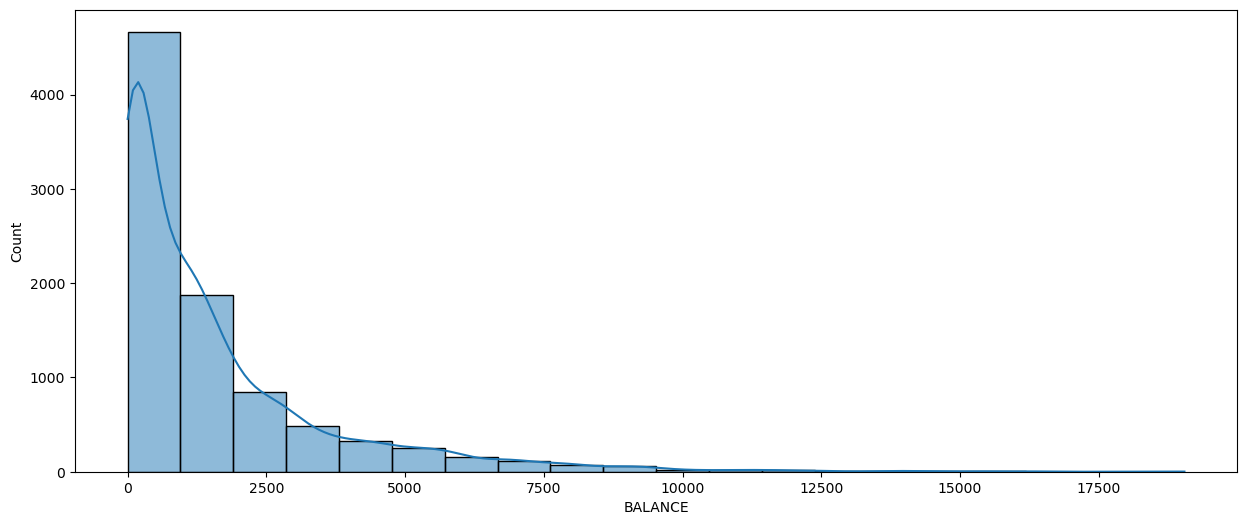

In [18]:
plt.figure(figsize=(15,6))
sns.histplot(data['BALANCE'],bins=20,kde=True,palette='hls')#KDE represents the data using a continuous probability density curve in one or more dimensions.
plt.show()

In [19]:
data['BALANCE_FREQUENCY'].unique()#unique can only be used when we have less values

array([0.818182, 0.909091, 1.      , 0.636364, 0.545455, 0.875   ,
       0.454545, 0.727273, 0.5     , 0.888889, 0.090909, 0.272727,
       0.363636, 0.      , 0.666667, 0.75    , 0.857143, 0.181818,
       0.333333, 0.6     , 0.3     , 0.125   , 0.9     , 0.833333,
       0.8     , 0.2     , 0.777778, 0.555556, 0.25    , 0.142857,
       0.571429, 0.4     , 0.444444, 0.714286, 0.222222, 0.1     ,
       0.625   , 0.428571, 0.111111, 0.285714, 0.7     , 0.375   ,
       0.166667])

In [20]:
data['BALANCE_FREQUENCY'].value_counts()

1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.555556      10
0.400000      10
0.375000       9
0.125000       9
0.200000       9
0.300000       9
0.250000       8
0.100000       8
0.285714       8
0.142857       7
0.444444       7
0.600000       6
0.166667       6
0.222222       5
0.428571       5
0.111111       5
Name: BALANCE_FREQUENCY, dtype: int64

In [21]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

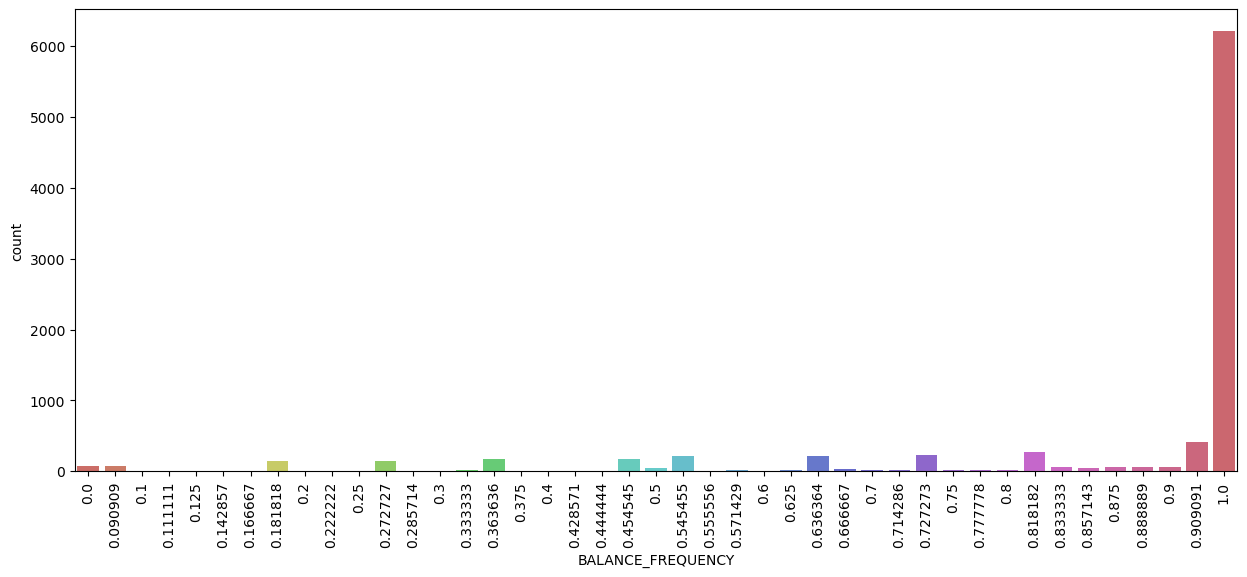

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['BALANCE_FREQUENCY'],data=data,
            palette='hls')
plt.xticks(rotation=90)
plt.show()

question arises that why i havent drawn countplot for balance,the reason is there are so much unique values in balance field

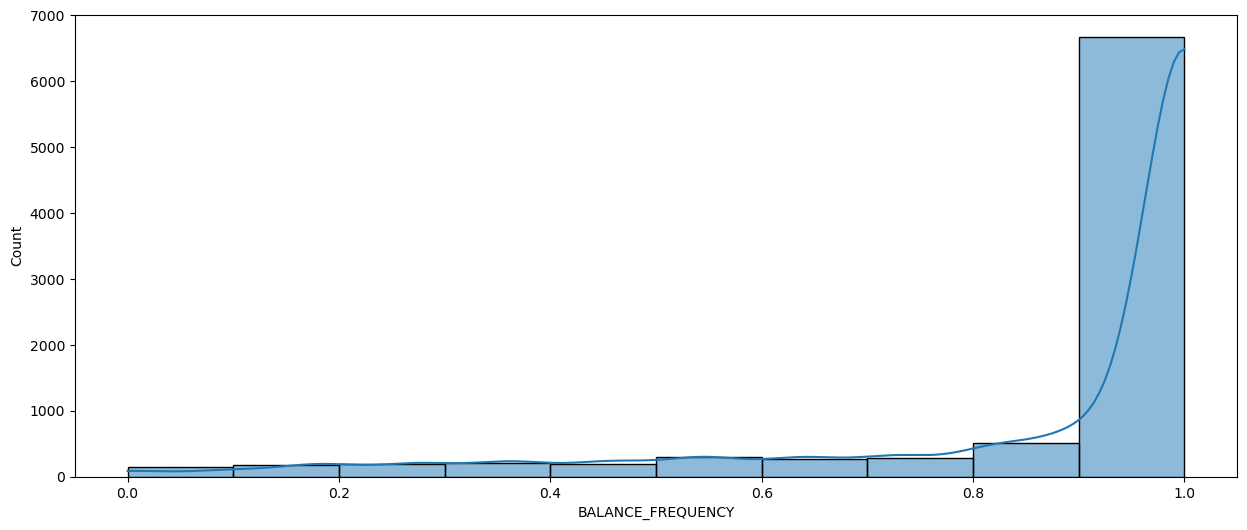

In [23]:
plt.figure(figsize=(15,6))
sns.histplot(data['BALANCE_FREQUENCY'],bins=10,kde=True,palette='hls')
plt.show()

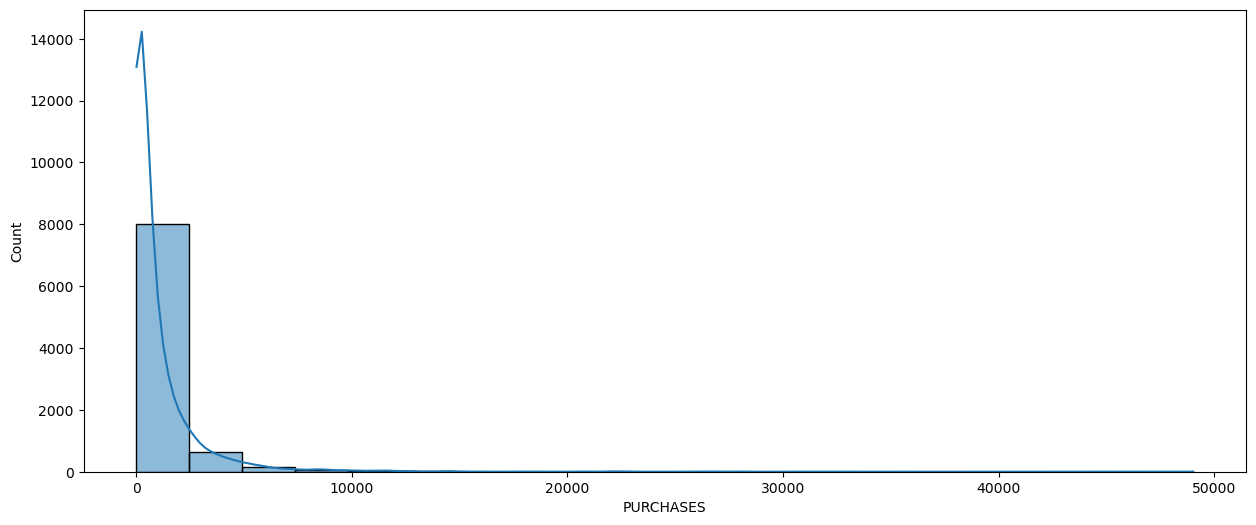

In [24]:
plt.figure(figsize=(15,6))
sns.histplot(data['PURCHASES'],bins=20,kde=True,palette=True)#too many unique values for purchases so we go with countplot
plt.show()

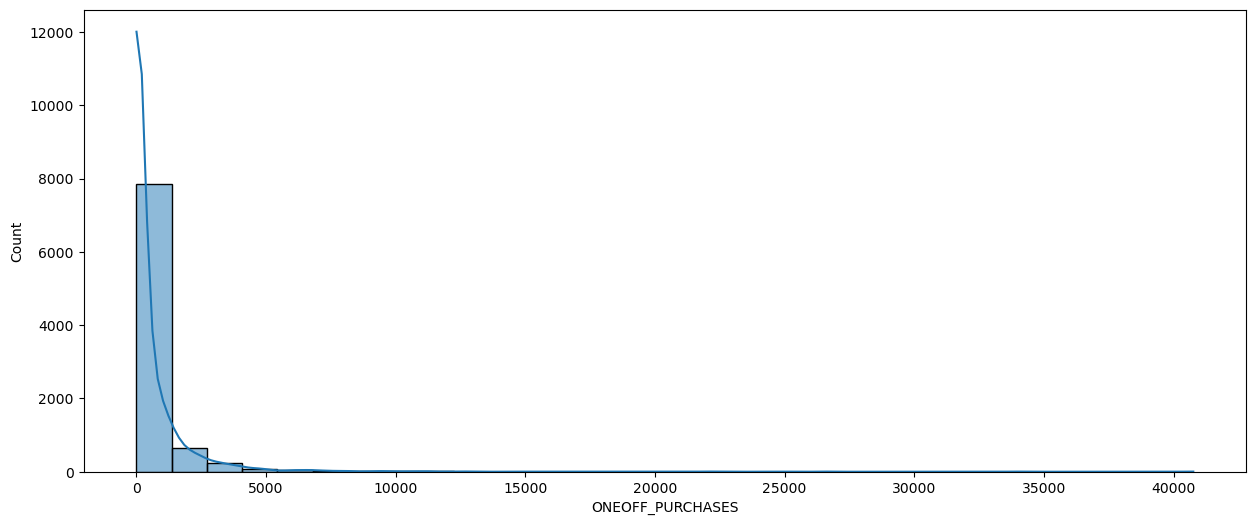

In [25]:
plt.figure(figsize=(15,6))
sns.histplot(data['ONEOFF_PURCHASES'],bins=30,kde=True,palette='hls')
plt.show()

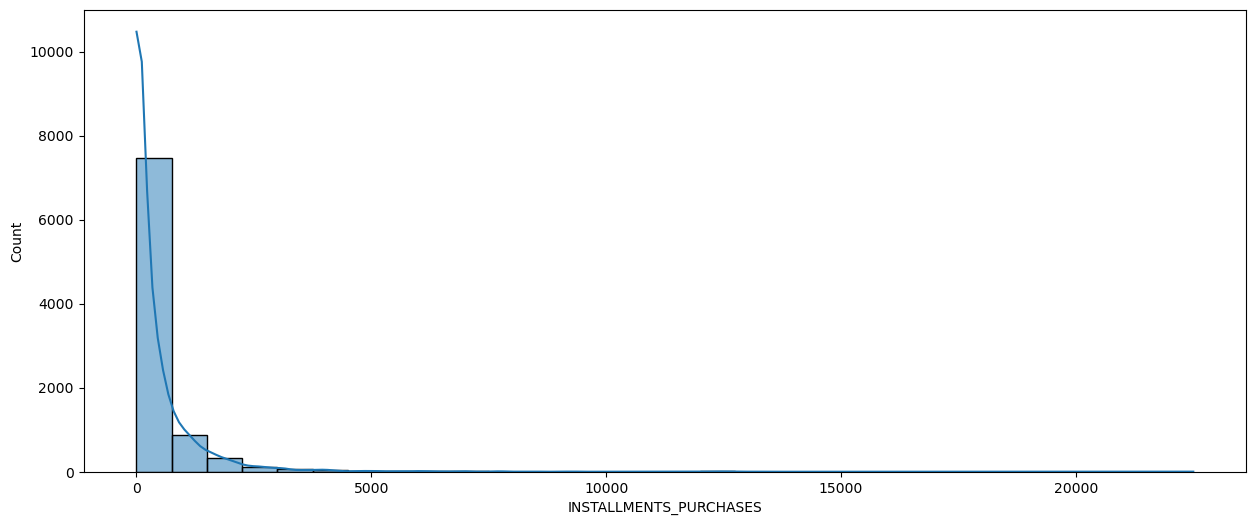

In [26]:
plt.figure(figsize=(15,6))
sns.histplot(data['INSTALLMENTS_PURCHASES'],bins=30,kde=True,palette='hls')
plt.show()

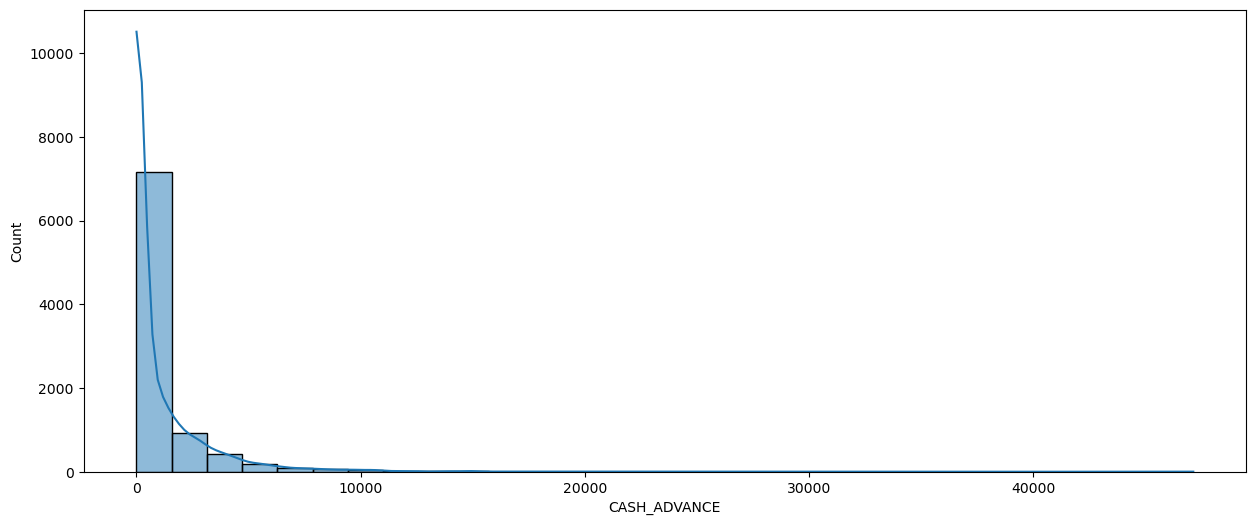

In [27]:
plt.figure(figsize=(15,6))
sns.histplot(data['CASH_ADVANCE'],bins=30,kde=True,palette='hls')
plt.show()

In [28]:
data['PURCHASES_FREQUENCY'].nunique()

47

In [29]:
data['PURCHASES_FREQUENCY'].unique()

array([0.166667, 0.      , 1.      , 0.083333, 0.666667, 0.333333,
       0.25    , 0.75    , 0.5     , 0.416667, 0.916667, 0.583333,
       0.375   , 0.625   , 0.272727, 0.833333, 0.909091, 0.111111,
       0.142857, 0.090909, 0.363636, 0.1     , 0.875   , 0.125   ,
       0.818182, 0.636364, 0.2     , 0.8     , 0.3     , 0.9     ,
       0.285714, 0.727273, 0.181818, 0.7     , 0.545455, 0.888889,
       0.714286, 0.454545, 0.857143, 0.555556, 0.428571, 0.4     ,
       0.571429, 0.6     , 0.222222, 0.777778, 0.444444])

In [30]:
data['PURCHASES_FREQUENCY'].value_counts()

1.000000    2178
0.000000    2042
0.083333     677
0.916667     396
0.500000     395
0.166667     392
0.833333     373
0.333333     367
0.250000     345
0.583333     316
0.666667     310
0.750000     299
0.416667     289
0.090909      43
0.125000      32
0.909091      28
0.100000      27
0.142857      26
0.875000      26
0.857143      25
0.900000      24
0.818182      21
0.545455      20
0.272727      19
0.454545      19
0.200000      19
0.111111      18
0.888889      18
0.636364      17
0.571429      16
0.181818      16
0.727273      15
0.300000      13
0.714286      13
0.222222      12
0.700000      11
0.600000      11
0.375000      10
0.363636      10
0.800000       9
0.428571       9
0.400000       9
0.285714       8
0.625000       8
0.555556       7
0.777778       6
0.444444       5
Name: PURCHASES_FREQUENCY, dtype: int64

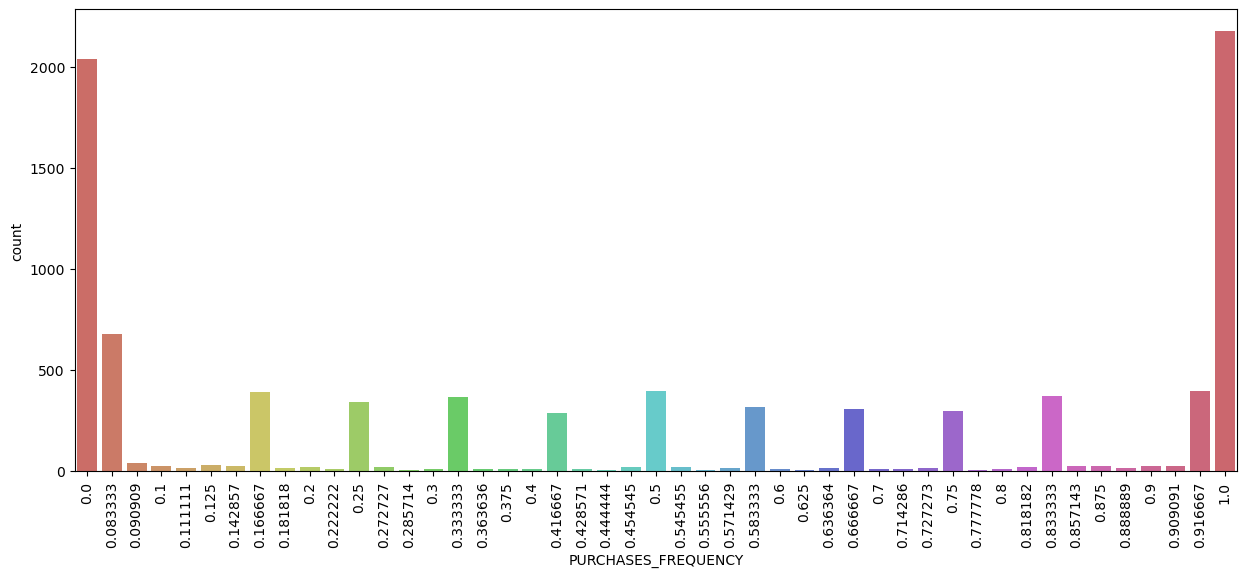

In [31]:
#as we have less unique values in purchases_frequency we can go for count plot visualization
plt.figure(figsize=(15,6))
sns.countplot(x=data['PURCHASES_FREQUENCY'],data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

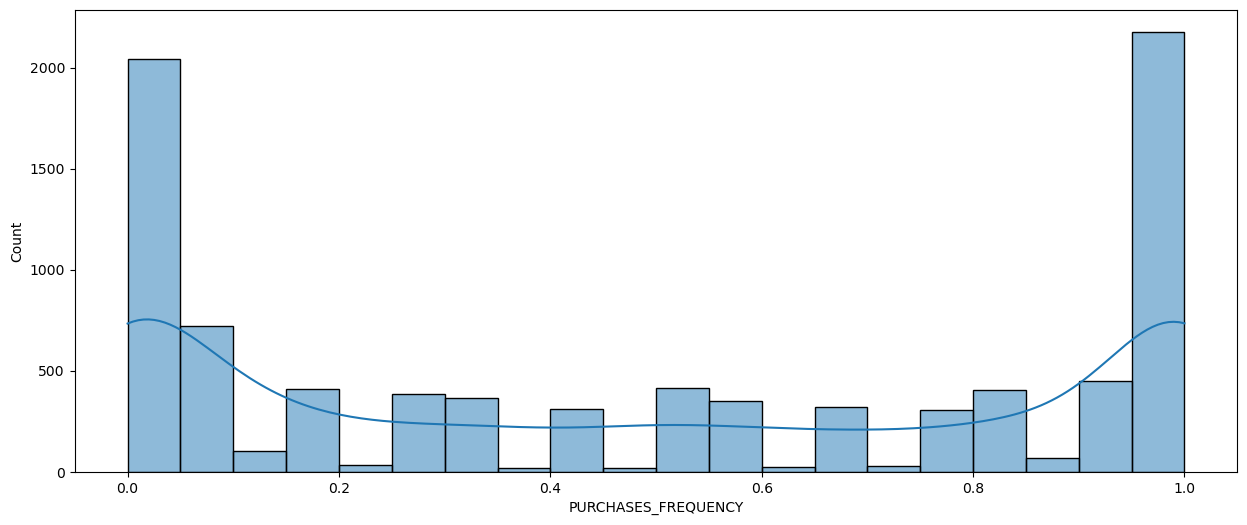

In [32]:
plt.figure(figsize=(15,6))
sns.histplot(data['PURCHASES_FREQUENCY'],bins=20,kde=True,palette='hls')
plt.show()

In [33]:
data['ONEOFF_PURCHASES_FREQUENCY'].unique()

array([0.      , 1.      , 0.083333, 0.166667, 0.25    , 0.916667,
       0.5     , 0.416667, 0.333333, 0.666667, 0.375   , 0.583333,
       0.1     , 0.090909, 0.833333, 0.75    , 0.111111, 0.142857,
       0.125   , 0.875   , 0.363636, 0.2     , 0.818182, 0.8     ,
       0.3     , 0.636364, 0.181818, 0.909091, 0.285714, 0.222222,
       0.727273, 0.571429, 0.6     , 0.272727, 0.714286, 0.545455,
       0.428571, 0.444444, 0.454545, 0.625   , 0.777778, 0.555556,
       0.7     , 0.9     , 0.4     , 0.857143, 0.888889])

In [34]:
data['ONEOFF_PURCHASES_FREQUENCY'].value_counts()

0.000000    4301
0.083333    1104
0.166667     592
1.000000     481
0.250000     418
0.333333     355
0.416667     244
0.500000     235
0.583333     197
0.666667     167
0.916667     151
0.750000     142
0.833333     120
0.090909      56
0.125000      41
0.100000      39
0.142857      37
0.181818      34
0.200000      27
0.111111      26
0.454545      13
0.363636      13
0.272727      12
0.222222      12
0.375000      11
0.571429      11
0.818182      10
0.300000      10
0.285714       9
0.428571       8
0.545455       8
0.600000       7
0.714286       7
0.636364       7
0.875000       6
0.727273       6
0.400000       5
0.700000       4
0.800000       4
0.444444       4
0.909091       4
0.625000       3
0.777778       2
0.555556       2
0.888889       2
0.900000       1
0.857143       1
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: int64

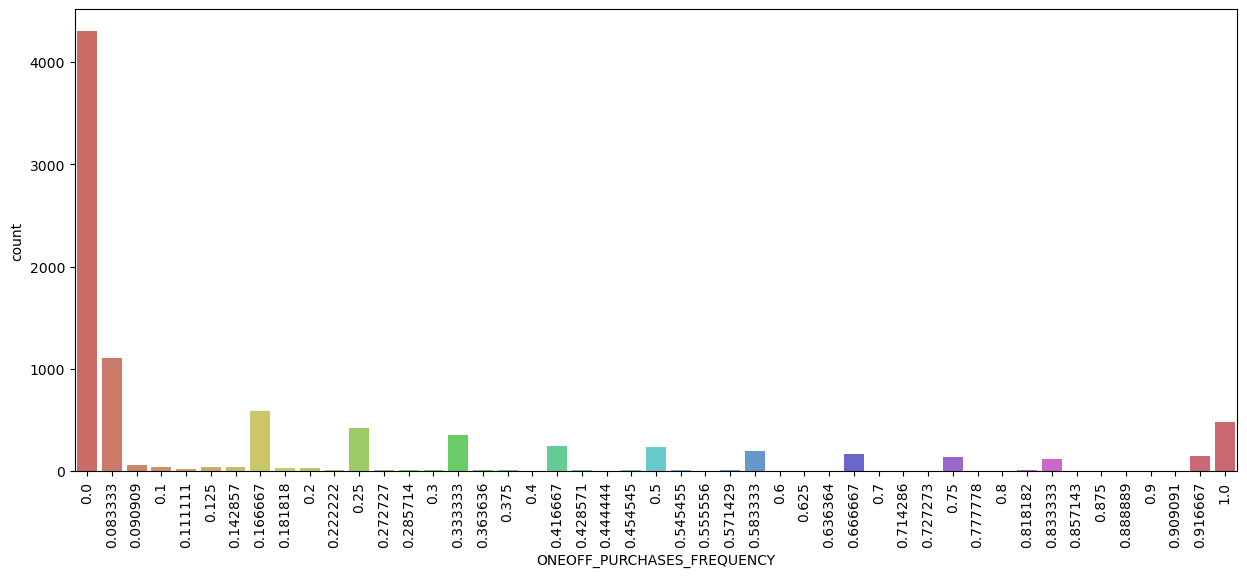

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['ONEOFF_PURCHASES_FREQUENCY'],data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

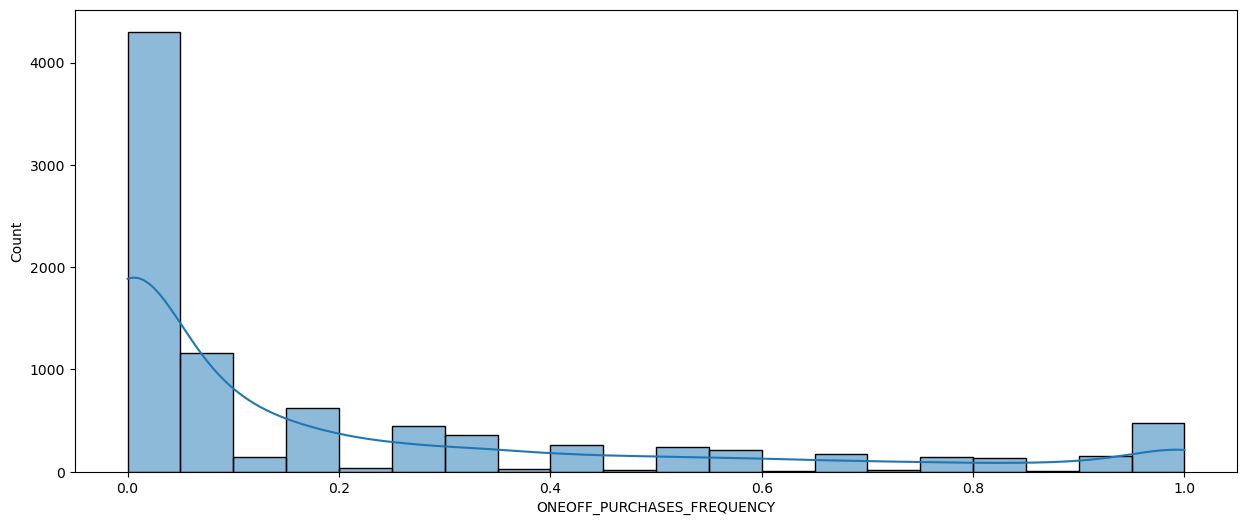

In [36]:
plt.figure(figsize=(15,6))
sns.histplot(data['ONEOFF_PURCHASES_FREQUENCY'],bins=20,kde=True,palette='hls')
plt.show()

In [37]:
data['PURCHASES_INSTALLMENTS_FREQUENCY'].nunique()#we have less unique values

47

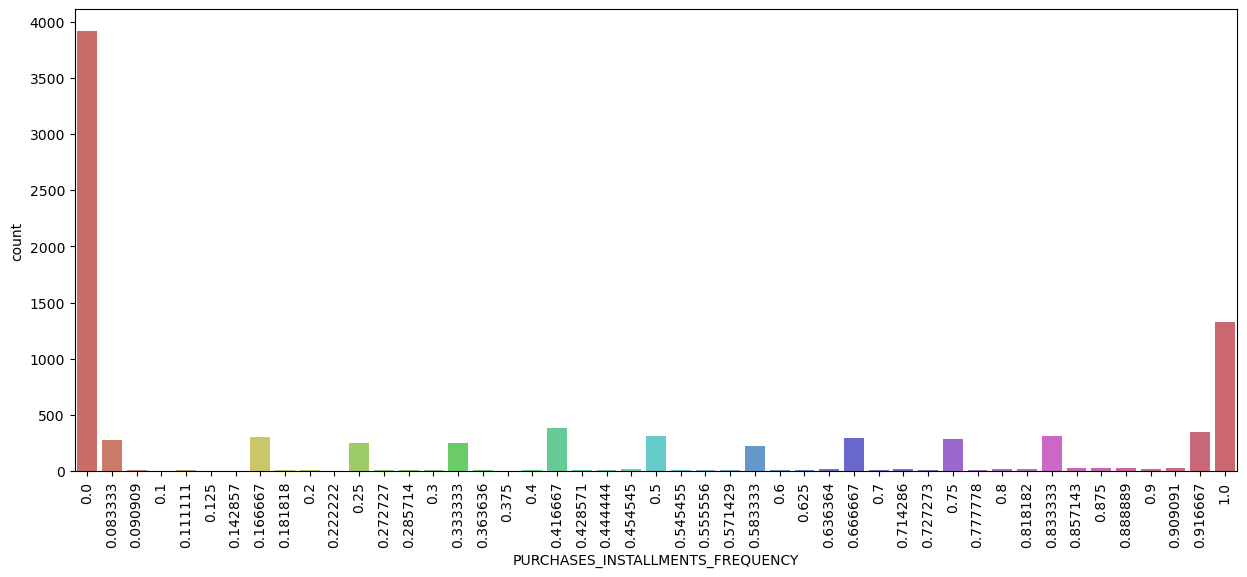

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['PURCHASES_INSTALLMENTS_FREQUENCY'],data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

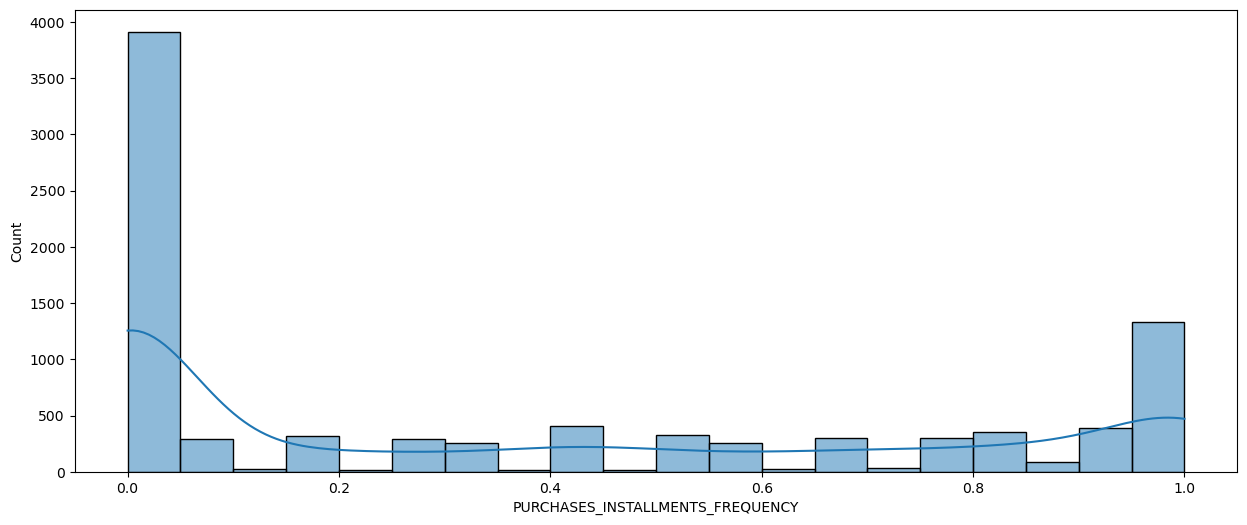

In [39]:
plt.figure(figsize=(15,6))
sns.histplot(data['PURCHASES_INSTALLMENTS_FREQUENCY'],bins=20,kde=True,palette='hls')
plt.show()

In [40]:
data['CASH_ADVANCE_FREQUENCY'].nunique()

54

In [41]:
data['CASH_ADVANCE_FREQUENCY'].value_counts()

0.000000    4628
0.083333    1021
0.166667     758
0.250000     578
0.333333     439
0.416667     273
0.500000     215
0.583333     142
0.666667     125
0.090909      70
0.750000      63
0.142857      49
0.833333      48
0.125000      47
0.181818      42
0.100000      39
0.272727      38
0.285714      30
0.111111      29
0.916667      27
1.000000      25
0.300000      23
0.428571      21
0.200000      21
0.363636      20
0.222222      18
0.400000      15
0.444444      15
0.454545      14
0.555556      12
0.571429      12
0.375000      11
0.545455      10
0.600000       9
0.727273       8
0.636364       8
0.800000       6
0.875000       5
0.857143       5
0.625000       5
0.714286       4
0.909091       3
0.777778       3
0.818182       2
1.166667       2
0.888889       2
0.900000       2
1.250000       1
1.090909       1
1.125000       1
0.700000       1
1.500000       1
1.100000       1
1.142857       1
Name: CASH_ADVANCE_FREQUENCY, dtype: int64

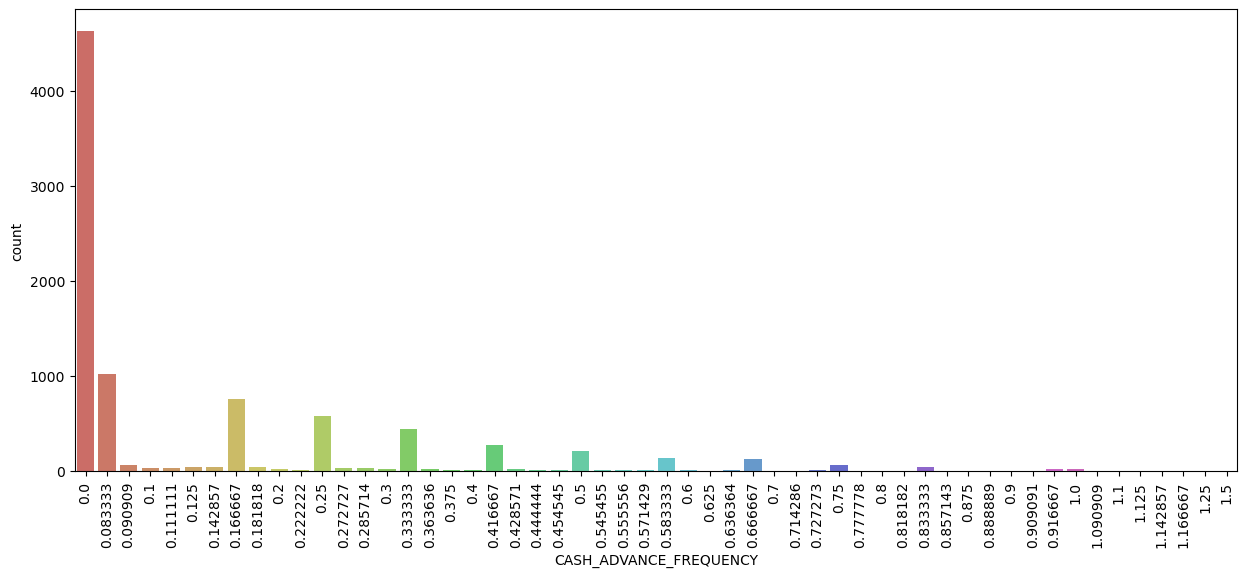

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['CASH_ADVANCE_FREQUENCY'],data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

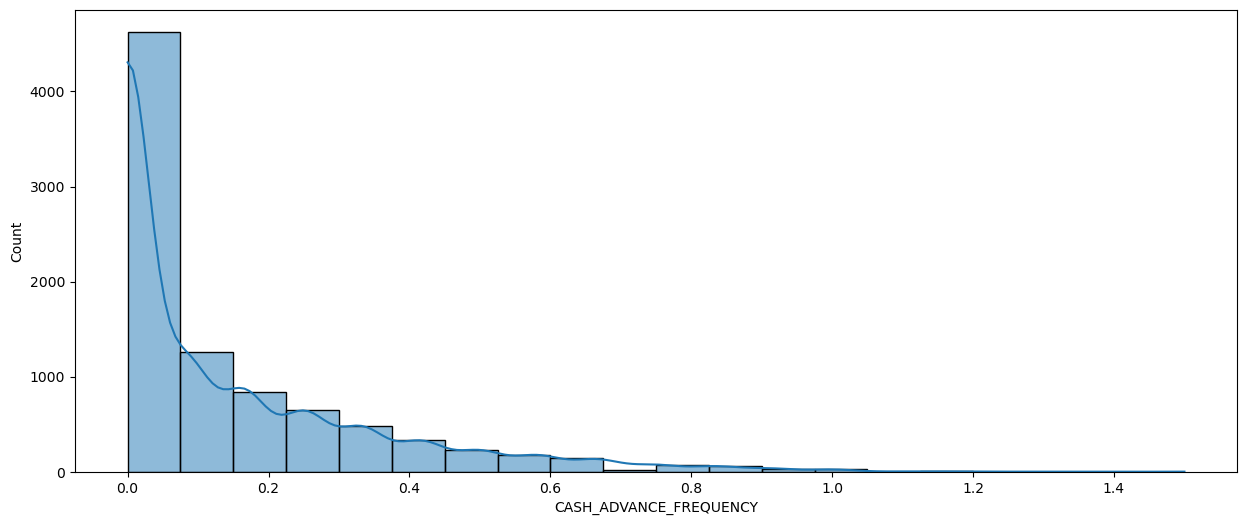

In [43]:
plt.figure(figsize=(15,6))
sns.histplot(data['CASH_ADVANCE_FREQUENCY'],bins=20,kde=True,palette='hls')
plt.show()

In [44]:
data['CASH_ADVANCE_TRX'].nunique() #as we have less unique values we can draw countplot for this field

65

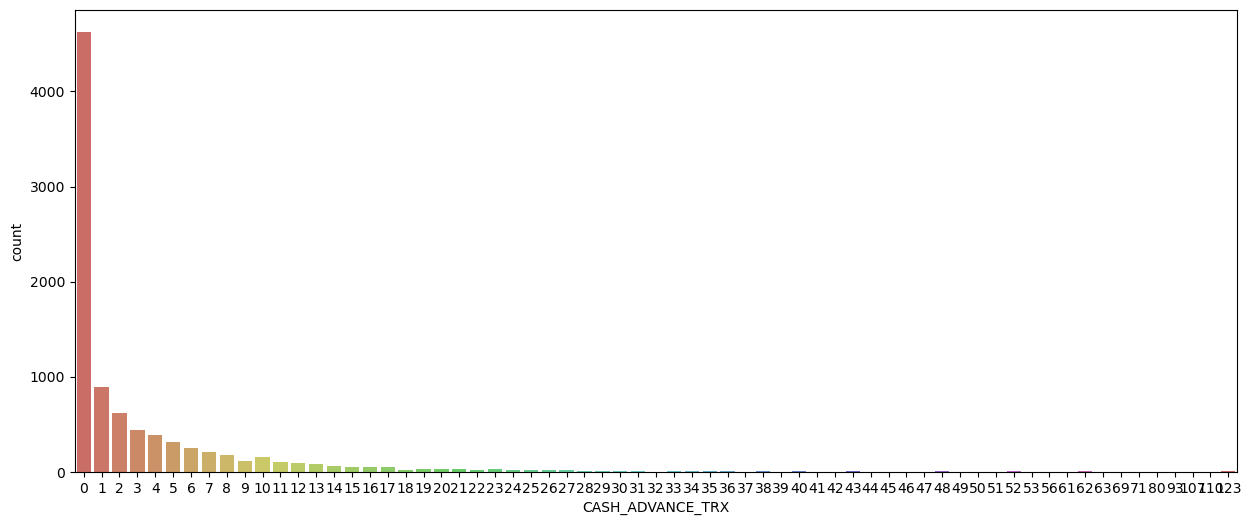

In [45]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['CASH_ADVANCE_TRX'],data=data,palette='hls')
plt.show()

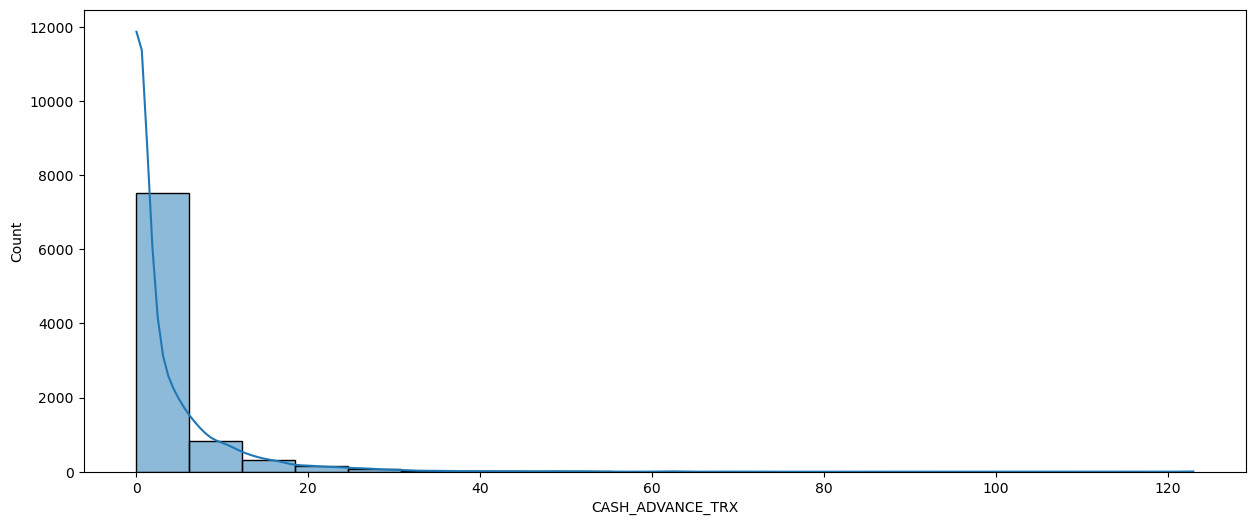

In [46]:
plt.figure(figsize=(15,6))
sns.histplot(data['CASH_ADVANCE_TRX'],bins=20,kde=True,palette='hls')
plt.show()

In [47]:
data['PURCHASES_TRX'].nunique()

173

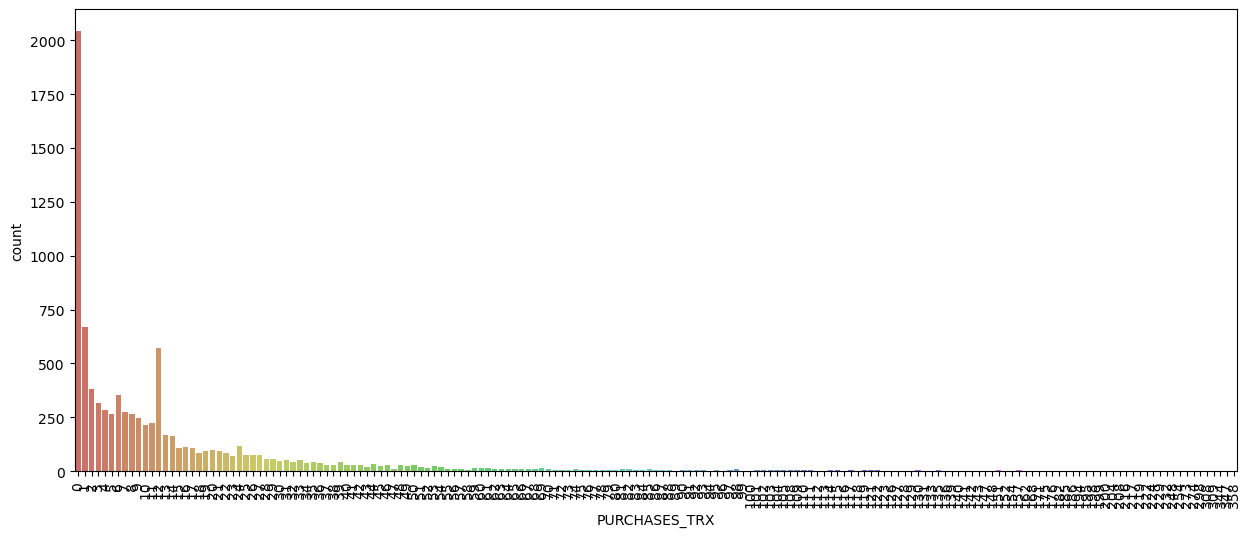

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['PURCHASES_TRX'],data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()
#not feasible 

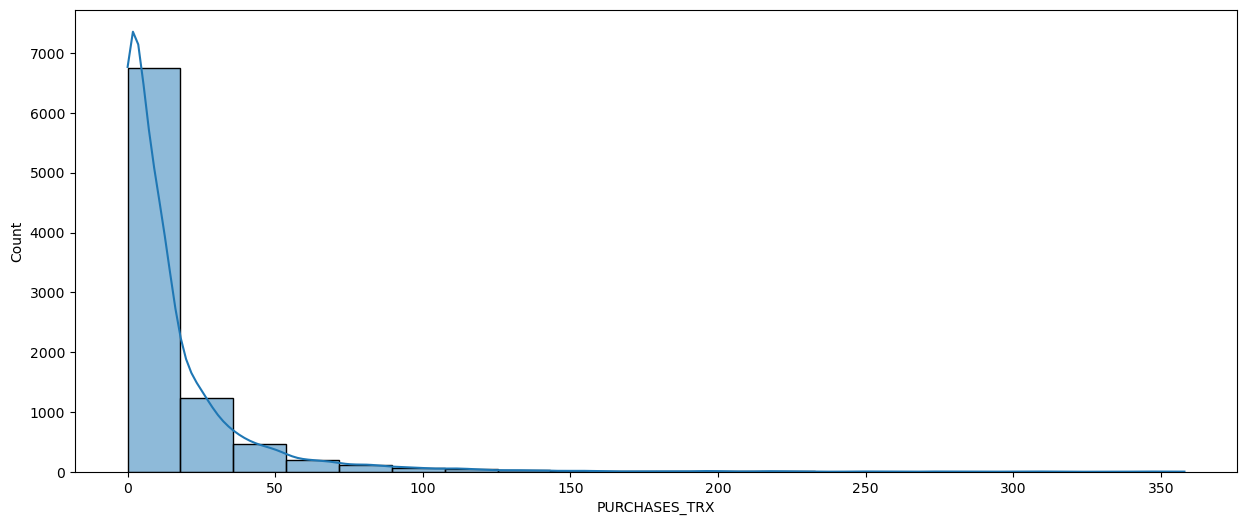

In [49]:
plt.figure(figsize=(15,6))
sns.histplot(data['PURCHASES_TRX'],bins=20,kde=True,palette='hls')
plt.show()

In [50]:
data['CREDIT_LIMIT'].nunique()

205

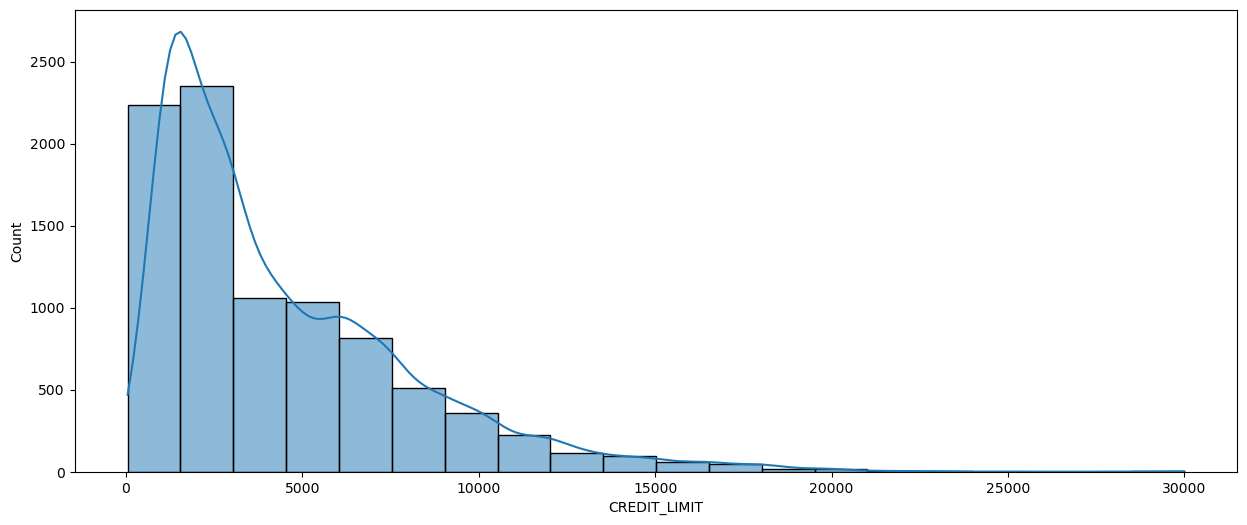

In [51]:
plt.figure(figsize=(15,6))
sns.histplot(data['CREDIT_LIMIT'],bins=20,kde=True,palette='hls')
plt.show()

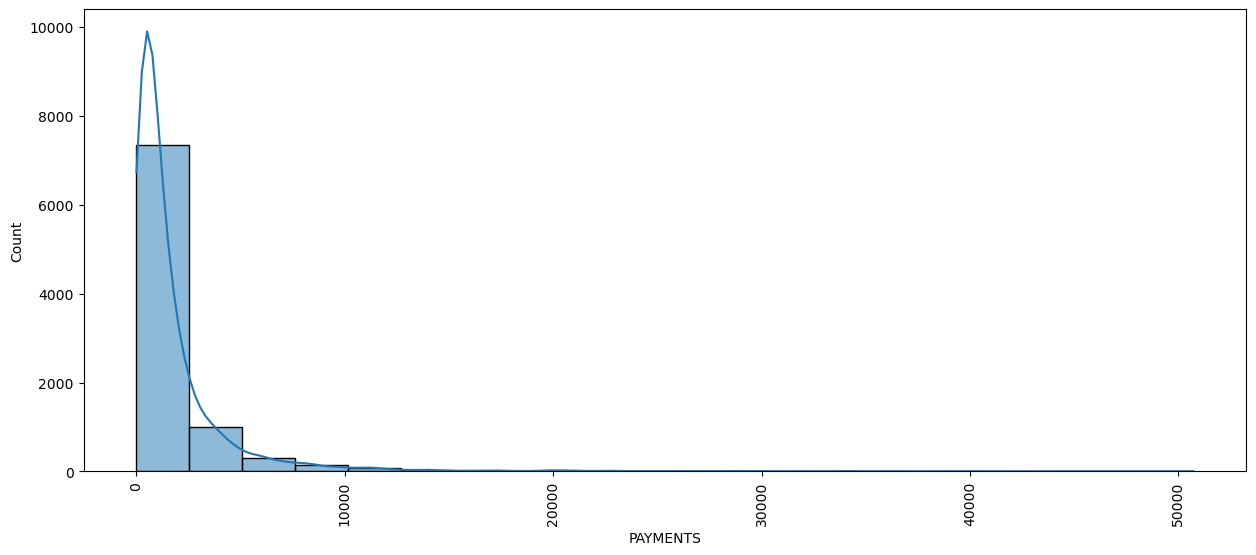

In [52]:
plt.figure(figsize=(15,6))
sns.histplot(data['PAYMENTS'],bins=20,kde=True,palette='hls')
plt.xticks(rotation=90)
plt.show()

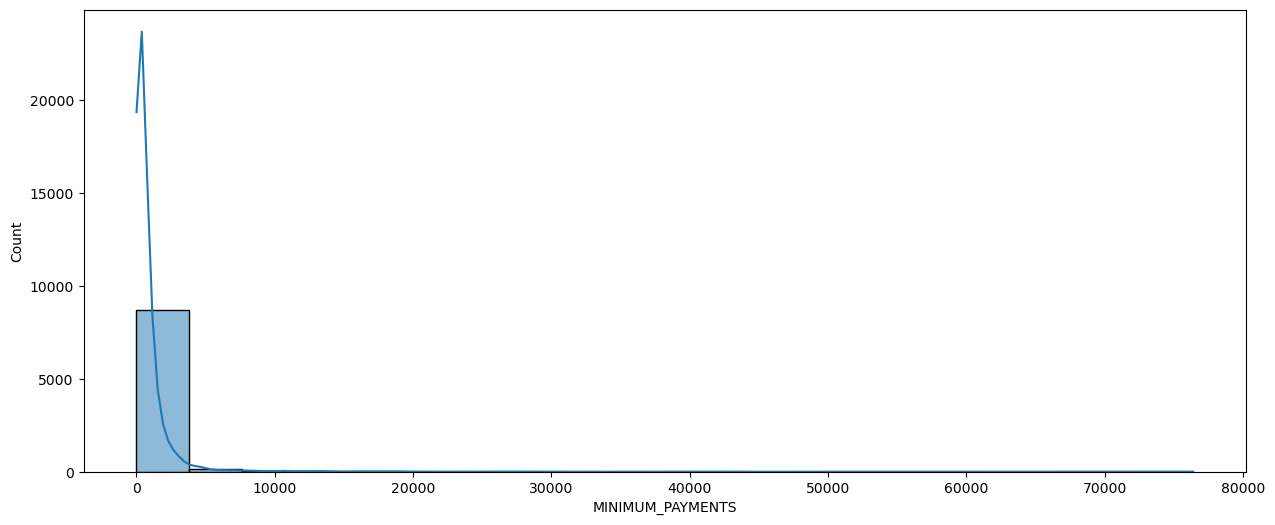

In [53]:
plt.figure(figsize=(15,6))
sns.histplot(data['MINIMUM_PAYMENTS'],bins=20,kde=True,palette='hls')
plt.show()

In [54]:
data['PRC_FULL_PAYMENT'].nunique()

47

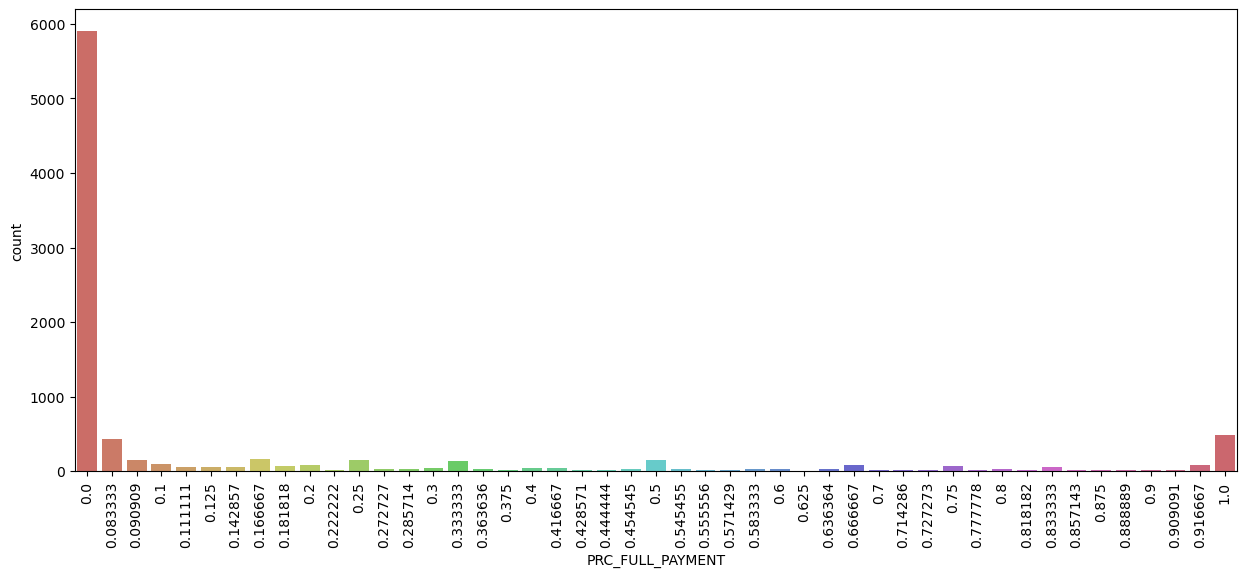

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['PRC_FULL_PAYMENT'],data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

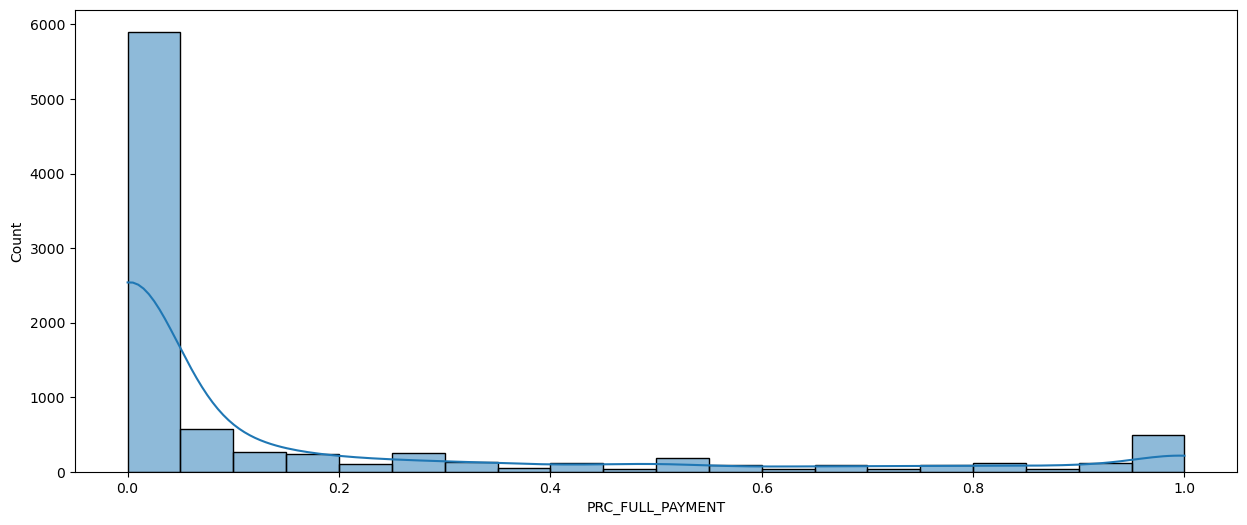

In [56]:
plt.figure(figsize=(15,6))
sns.histplot(data['PRC_FULL_PAYMENT'],bins=20,kde=True,palette='hls')
plt.show()


In [57]:
data['TENURE'].nunique()

7

In [58]:
data['TENURE'].value_counts()

12    7584
11     365
10     236
6      203
8      196
7      190
9      175
Name: TENURE, dtype: int64

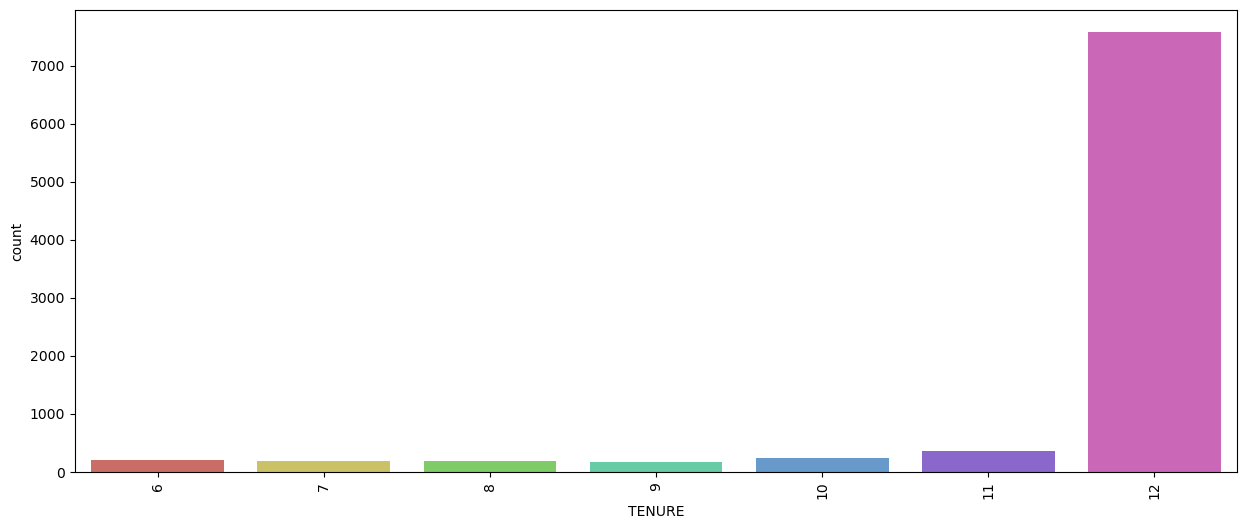

In [59]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['TENURE'],data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

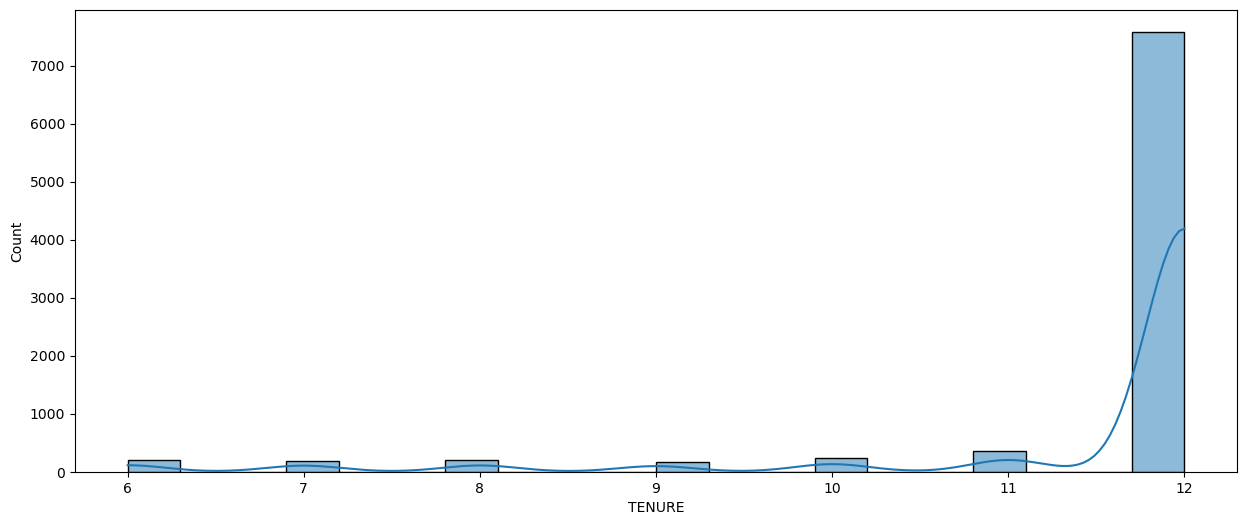

In [60]:
plt.figure(figsize=(15,6))
sns.histplot(data['TENURE'],bins=20,kde=True,palette='hls')
plt.show()

BIVARIATE ANALYSIS (establishing a relationship bw 2 variables)

- Best visualization tool for bivariate analysis would be scatterplot and even line plot!


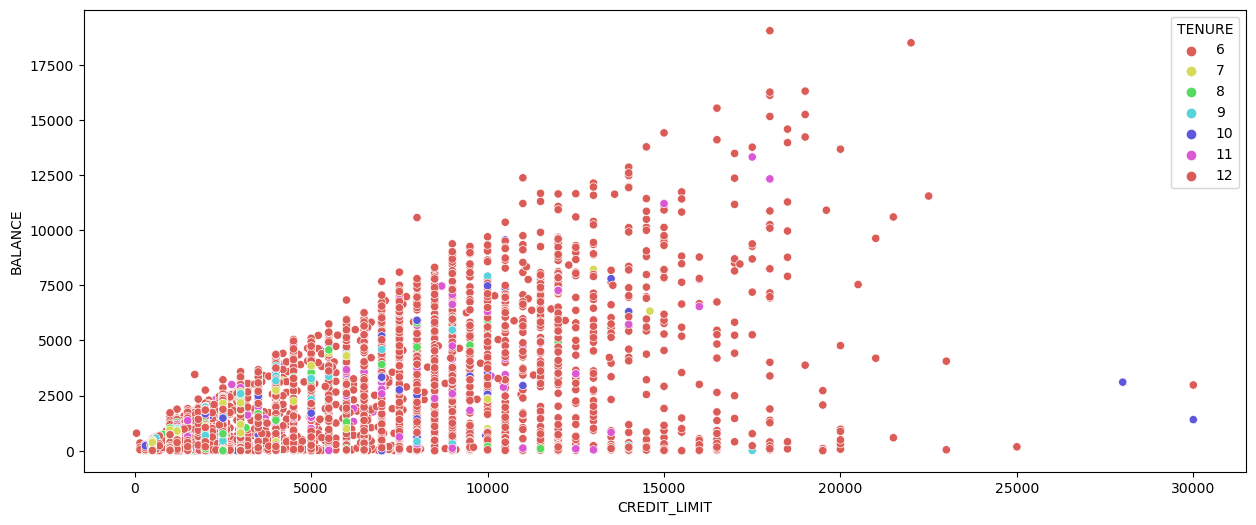

In [61]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=data['CREDIT_LIMIT'],y=data['BALANCE'],hue=data['TENURE'],data=data,palette='hls')
plt.show()

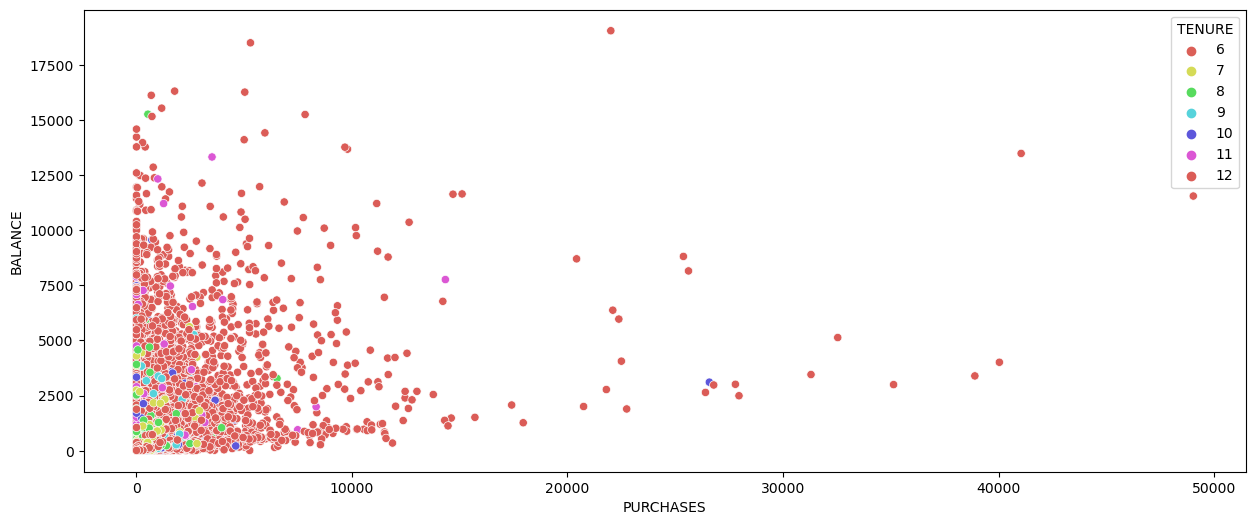

In [62]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=data['PURCHASES'],y=data['BALANCE'],hue=data['TENURE'],data=data,palette='hls')
plt.show()

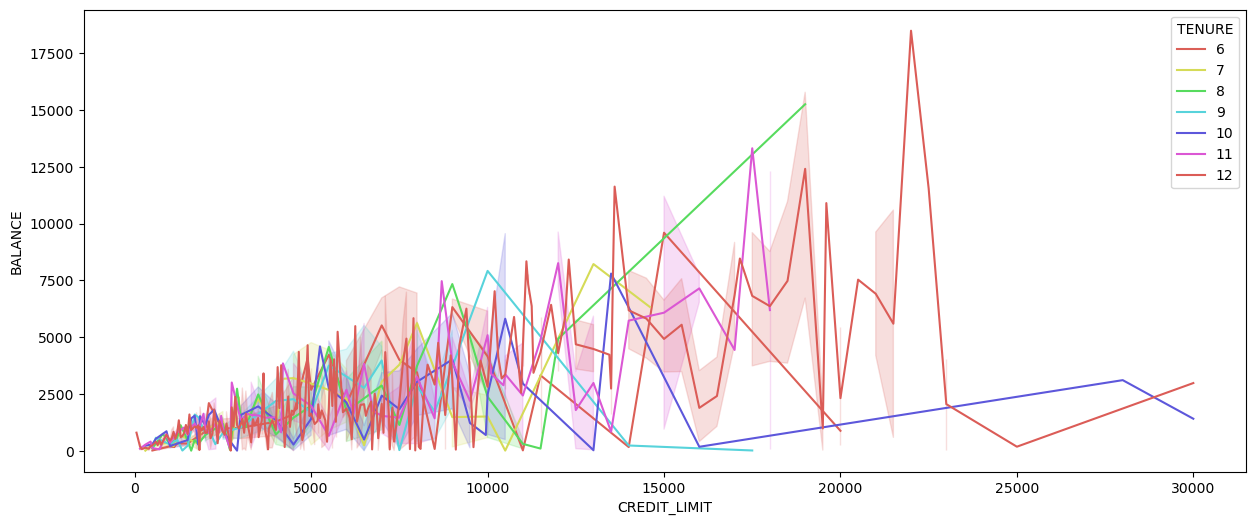

In [63]:
plt.figure(figsize=(15,6))
sns.lineplot(x=data['CREDIT_LIMIT'],y=data['BALANCE'],hue=data['TENURE'],data=data,palette='hls')
plt.show()

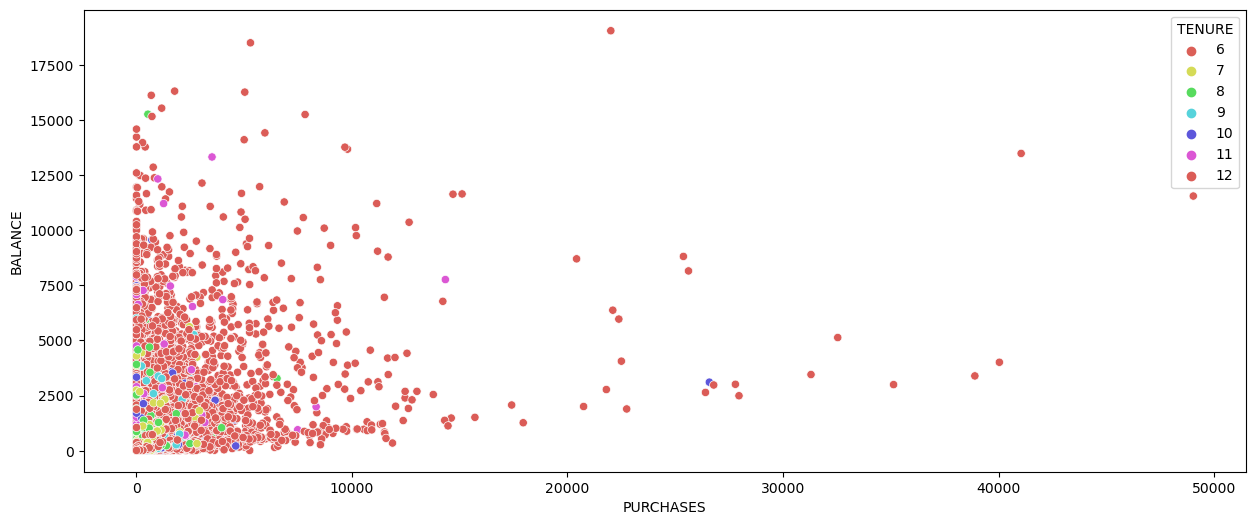

In [64]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=data['PURCHASES'],y=data['BALANCE'],hue=data['TENURE'],data=data,palette='hls')
plt.show()

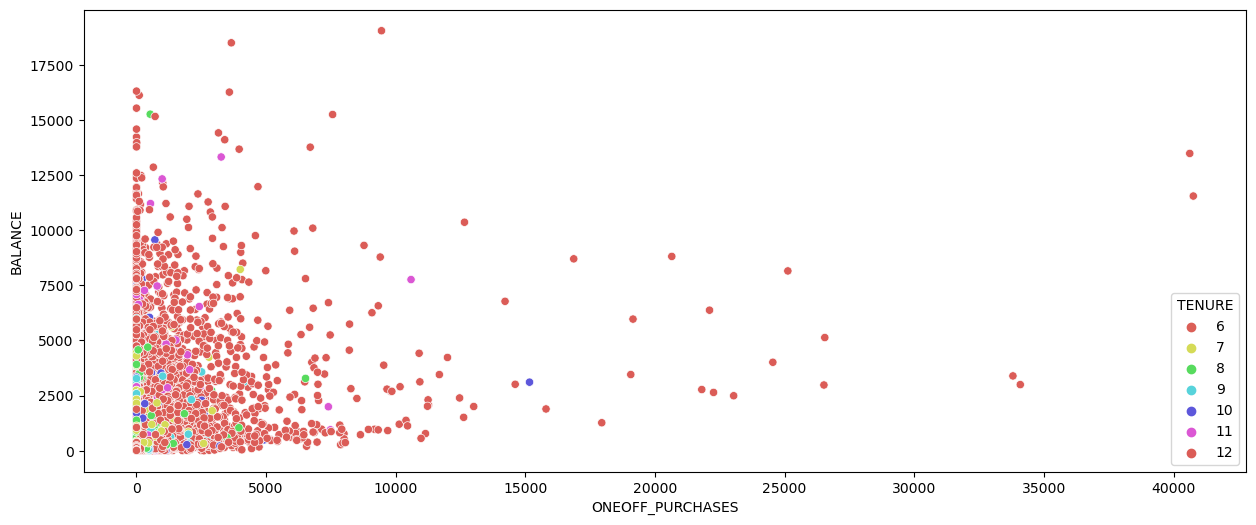

In [65]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=data['ONEOFF_PURCHASES'],y=data['BALANCE'],hue=data['TENURE'],data=data,palette='hls')
plt.show()

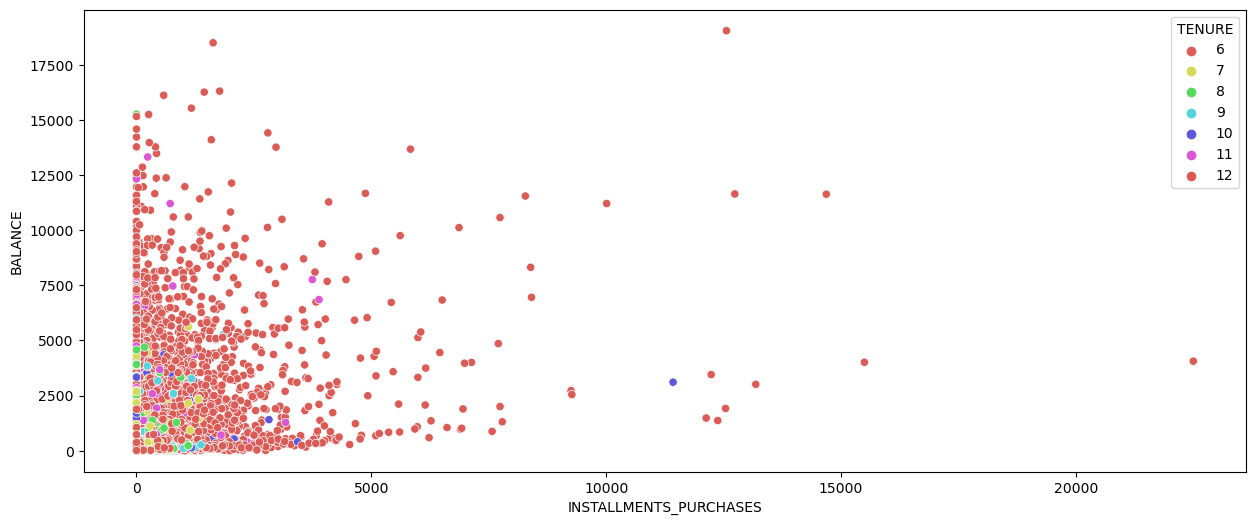

In [66]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=data['INSTALLMENTS_PURCHASES'],y=data['BALANCE'],hue=data['TENURE'],data=data,palette='hls')
plt.show()

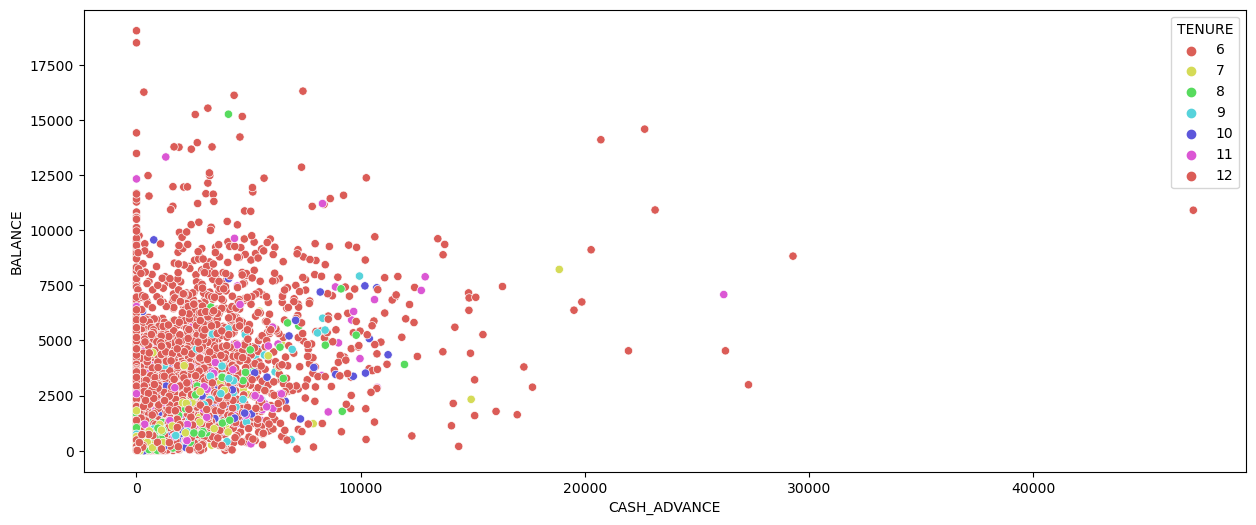

In [67]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=data['CASH_ADVANCE'],y=data['BALANCE'],hue=data['TENURE'],data=data,palette='hls')
plt.show()

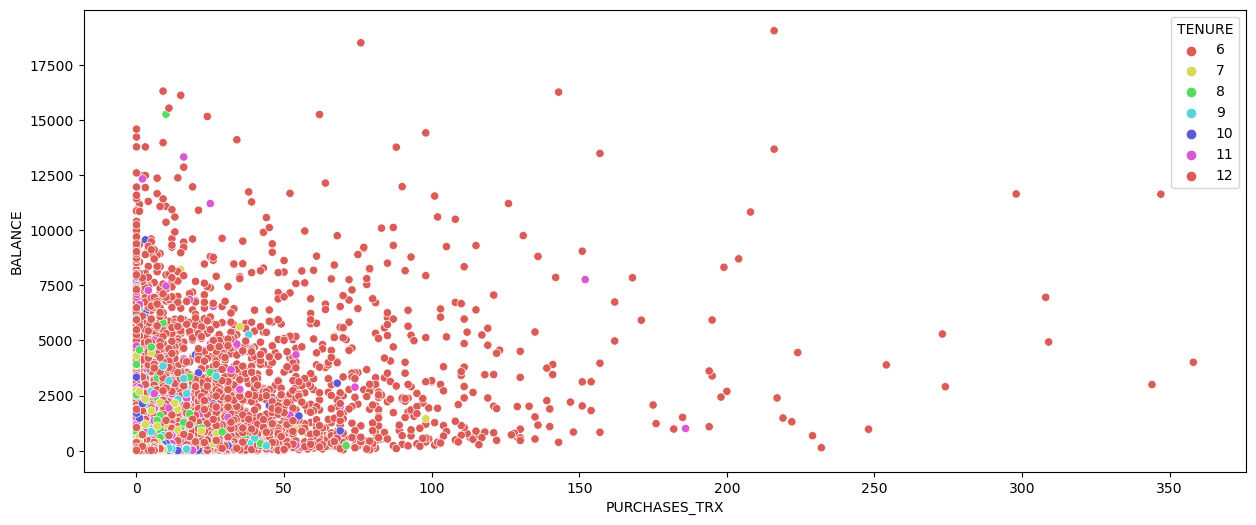

In [68]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=data['PURCHASES_TRX'],y=data['BALANCE'],hue=data['TENURE'],data=data,palette='hls')
plt.show()

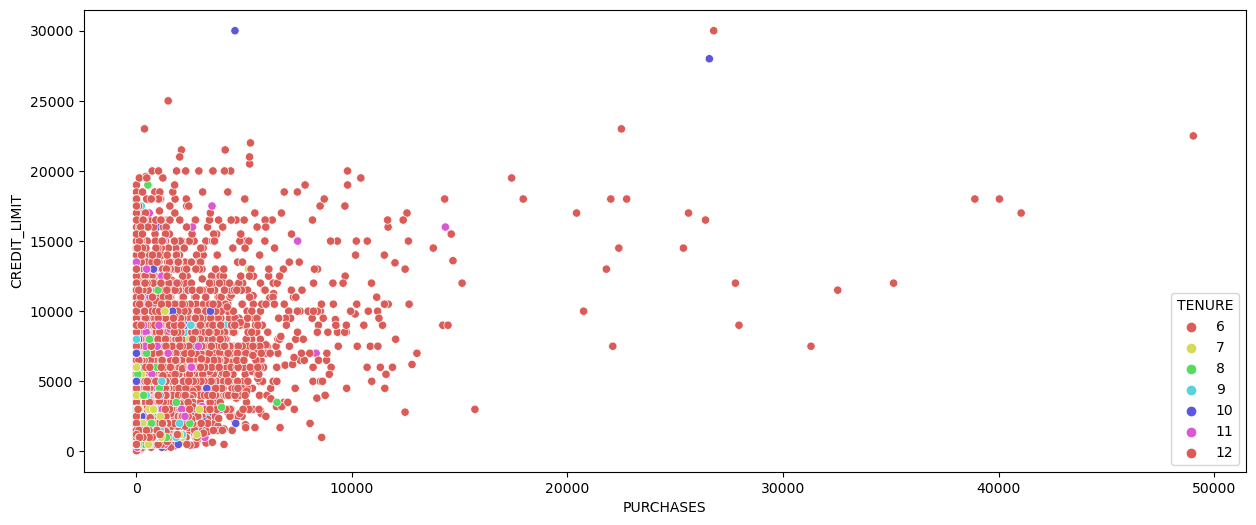

In [69]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=data['PURCHASES'],y=data['CREDIT_LIMIT'],hue=data['TENURE'],data=data,palette='hls')
plt.show()

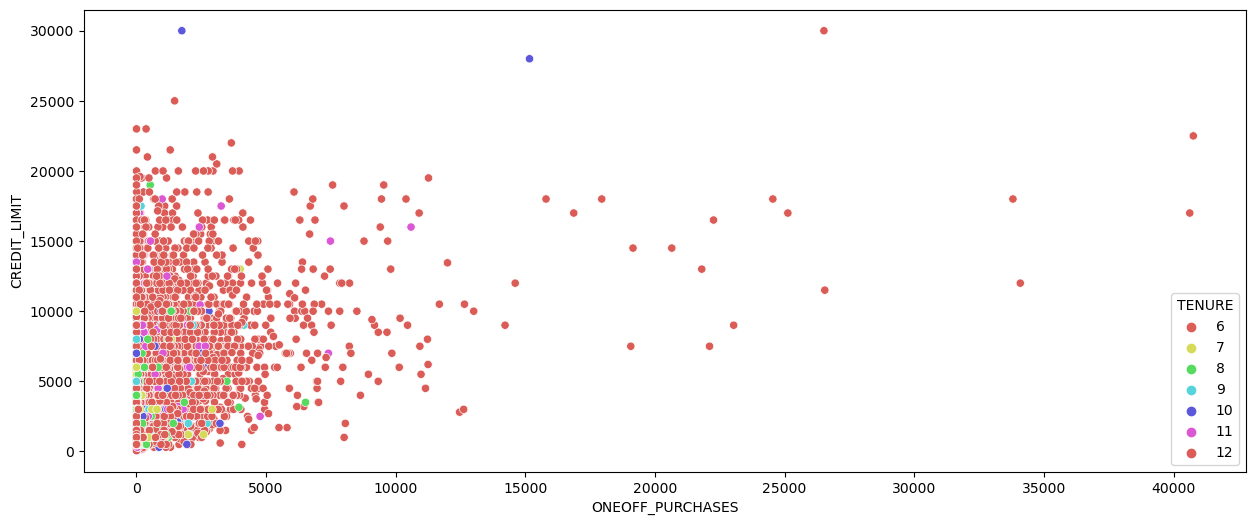

In [70]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=data['ONEOFF_PURCHASES'],y=data['CREDIT_LIMIT'],hue=data['TENURE'],data=data,palette='hls')
plt.show()

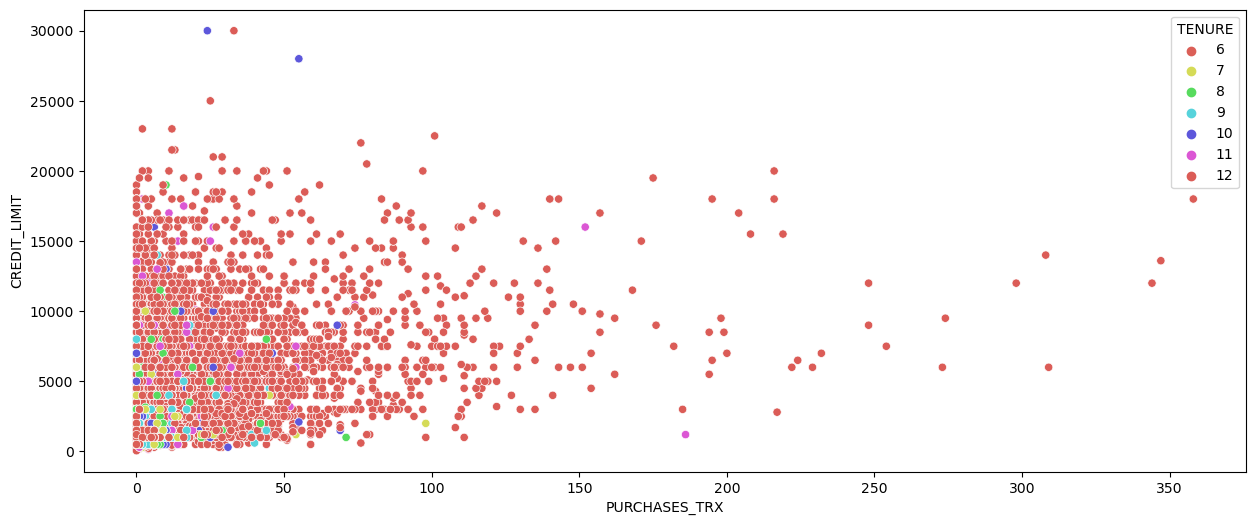

In [71]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=data['PURCHASES_TRX'],y=data['CREDIT_LIMIT'],hue=data['TENURE'],data=data,palette='hls')
plt.show()

DROPPING THE FEATURES THAT ARE NOT IMPORTANT

In [72]:
data=data.drop('CUST_ID',axis=1)

BOXPLOT FOR IDENTIFYING OUTLIERS(corrupt entries)


boxplot for : BALANCE


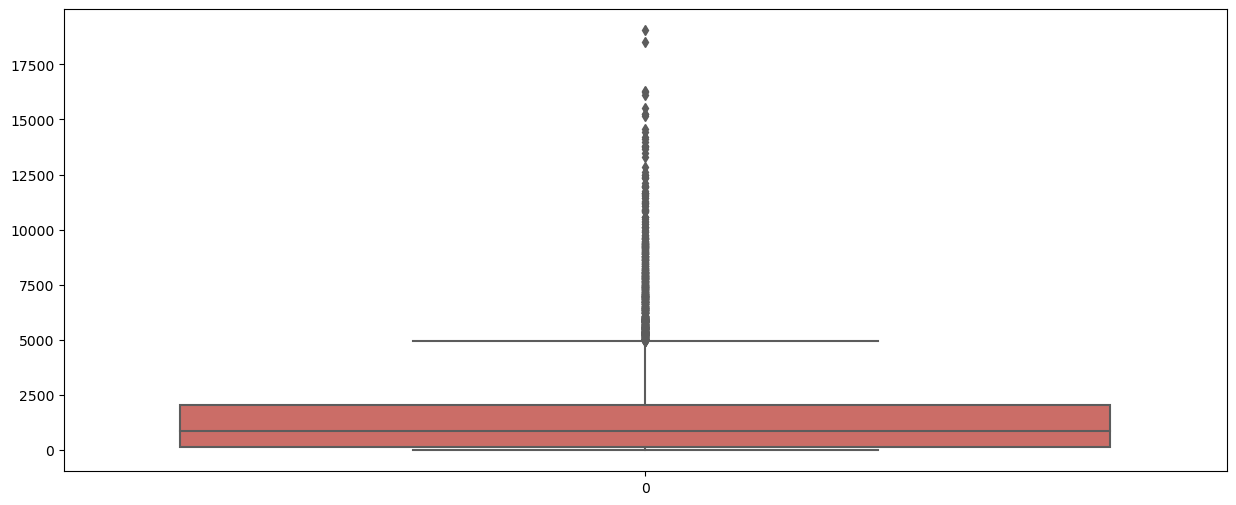

boxplot for : BALANCE_FREQUENCY


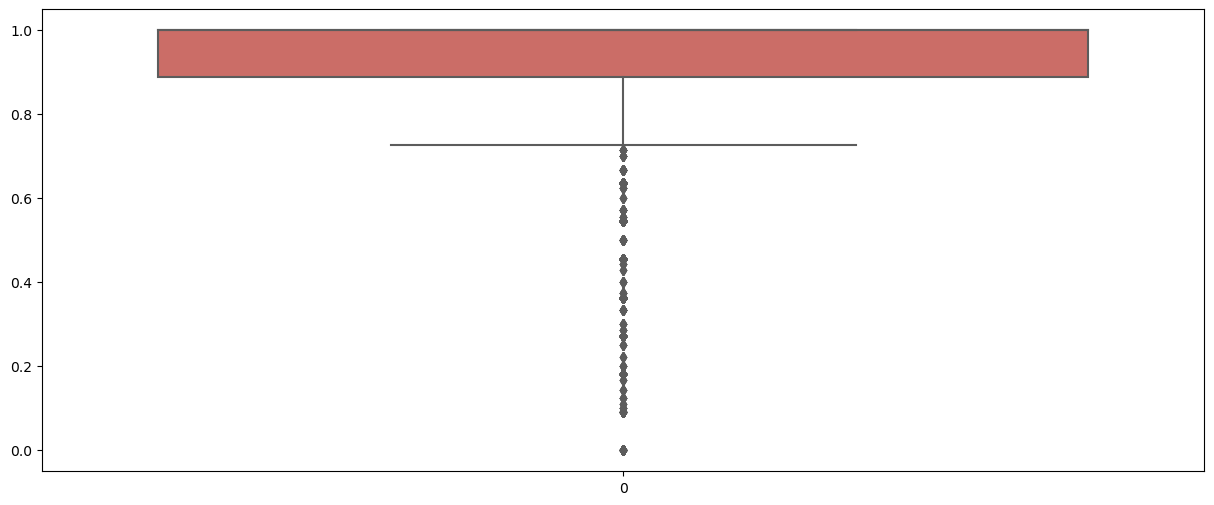

boxplot for : PURCHASES


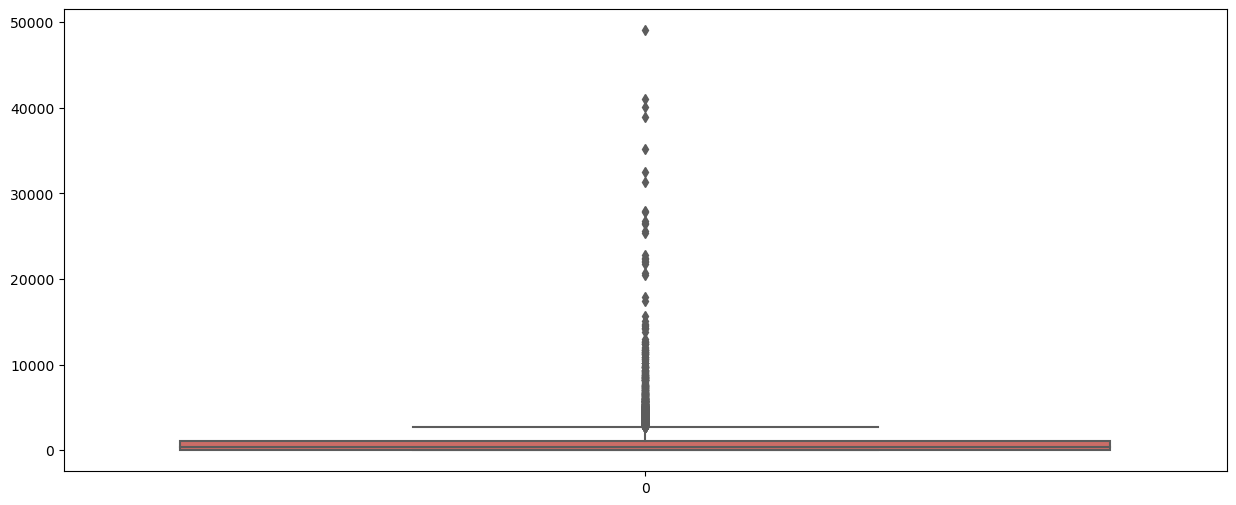

boxplot for : ONEOFF_PURCHASES


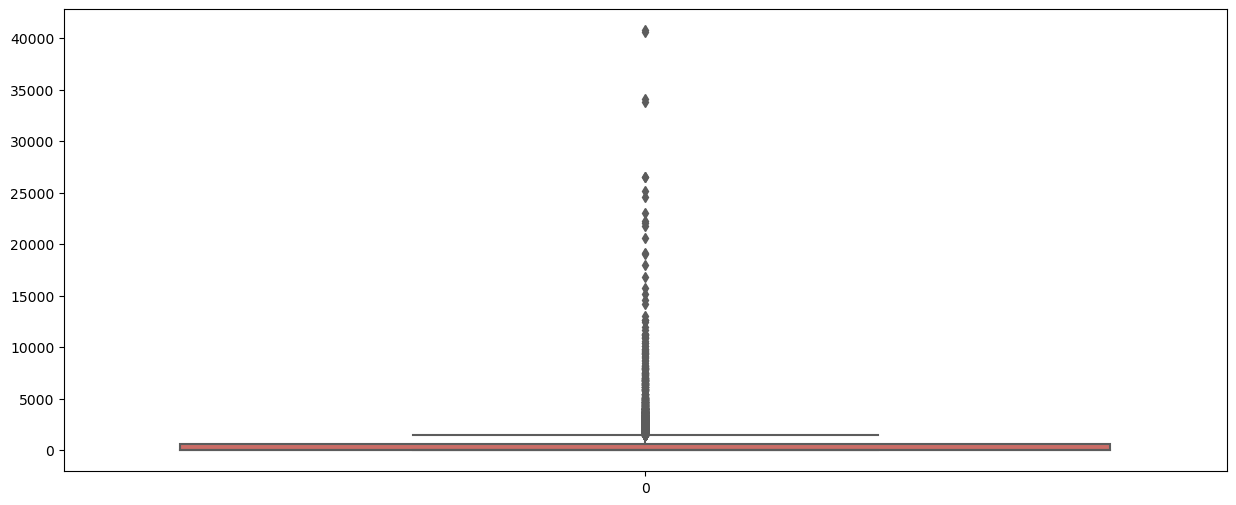

boxplot for : INSTALLMENTS_PURCHASES


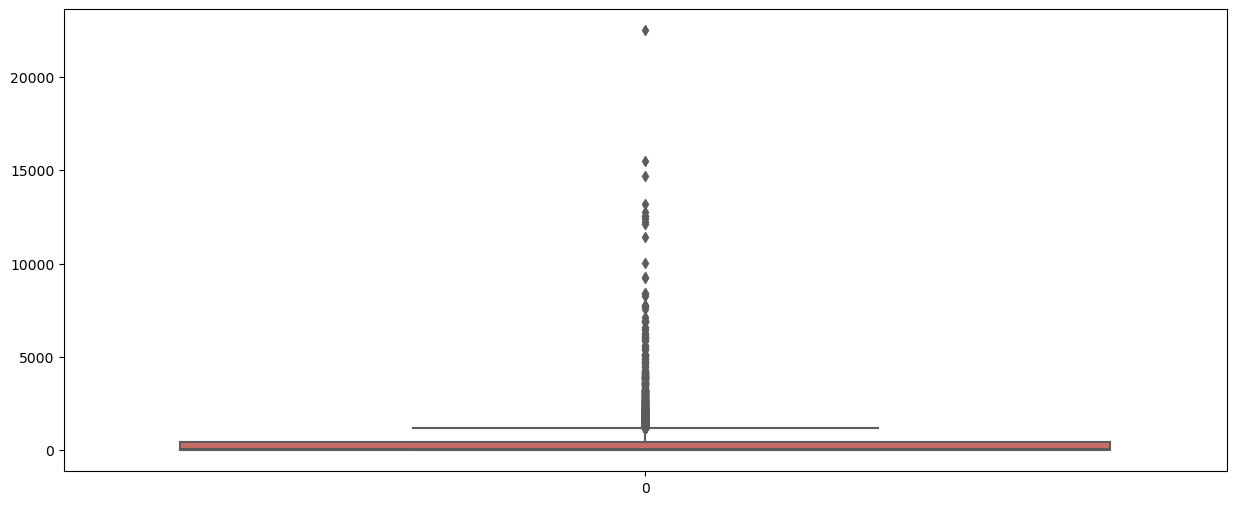

boxplot for : CASH_ADVANCE


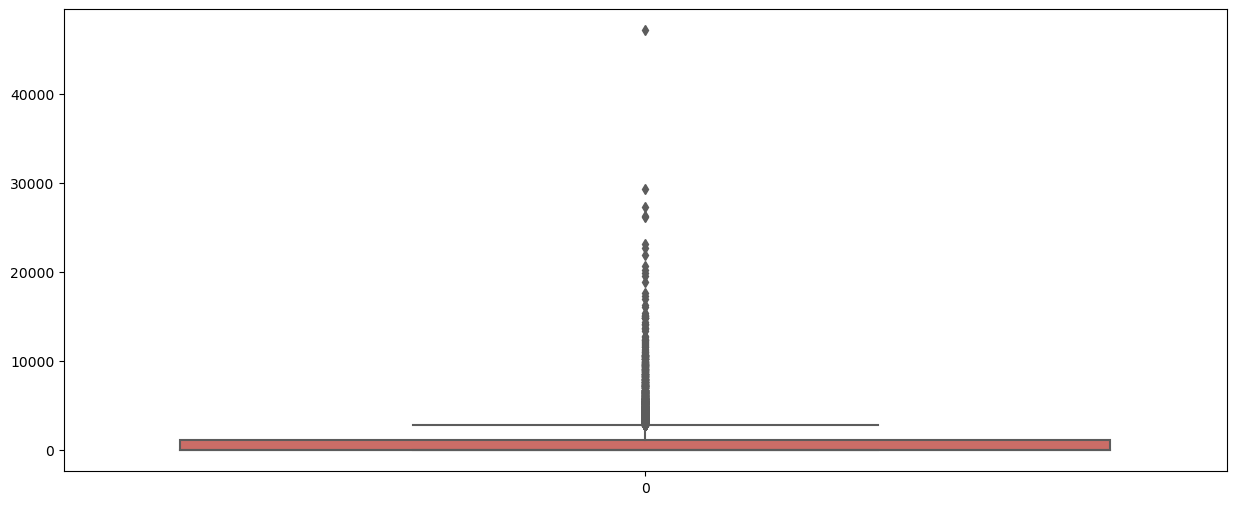

boxplot for : PURCHASES_FREQUENCY


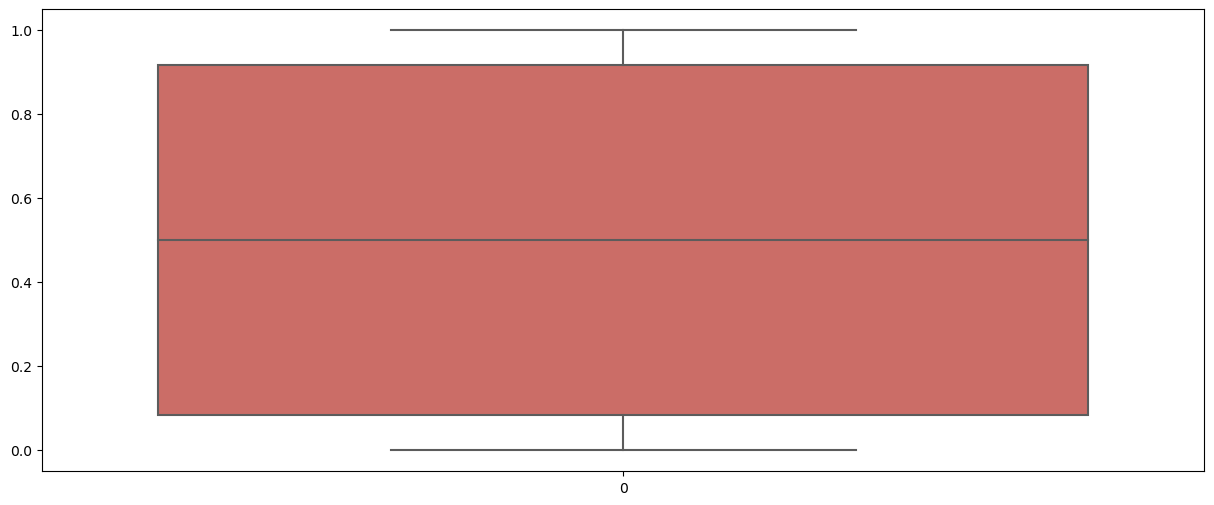

boxplot for : ONEOFF_PURCHASES_FREQUENCY


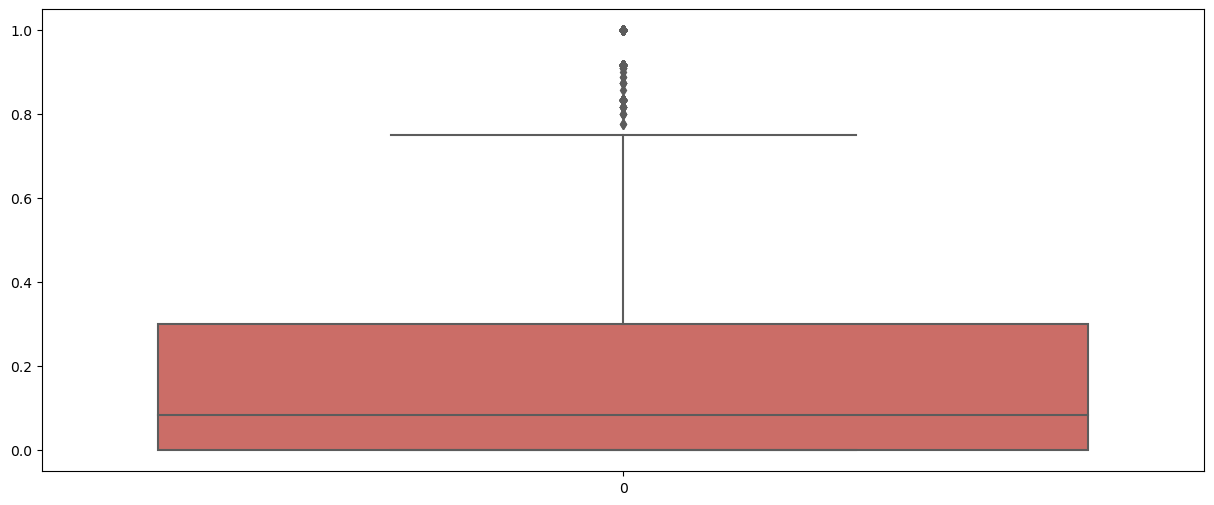

boxplot for : PURCHASES_INSTALLMENTS_FREQUENCY


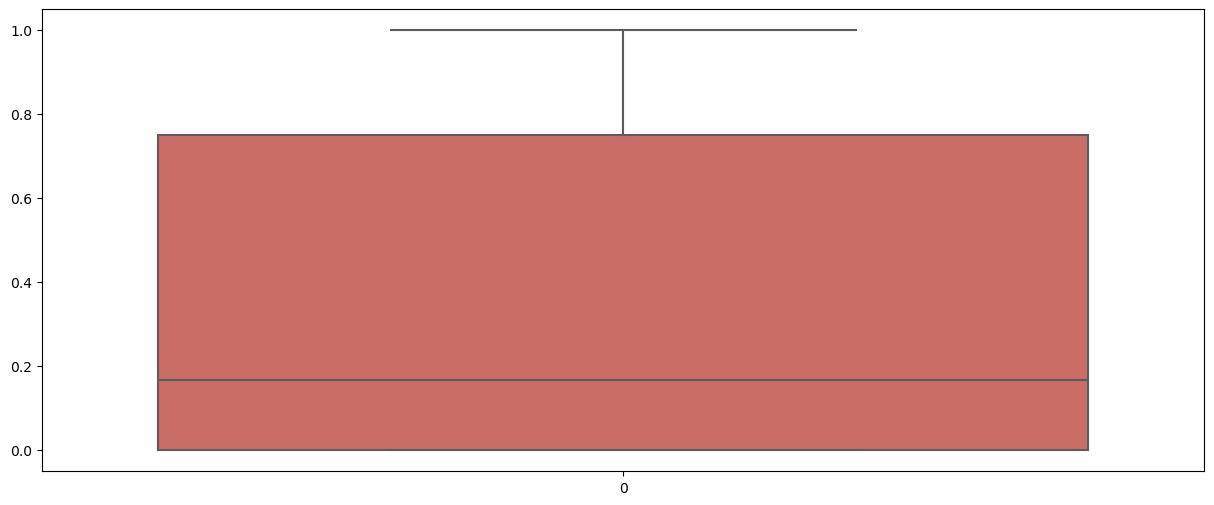

boxplot for : CASH_ADVANCE_FREQUENCY


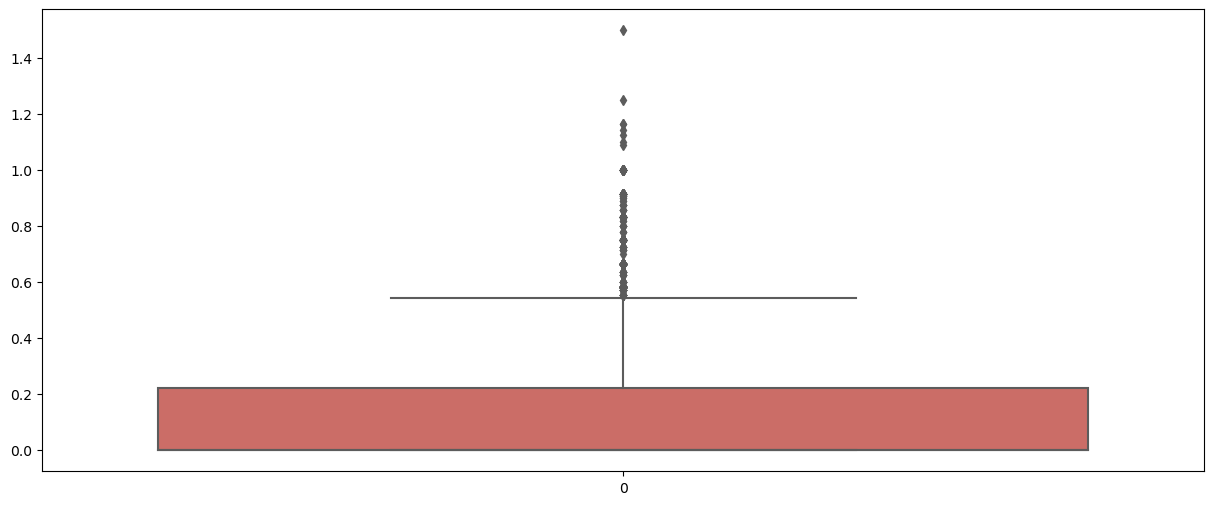

boxplot for : CASH_ADVANCE_TRX


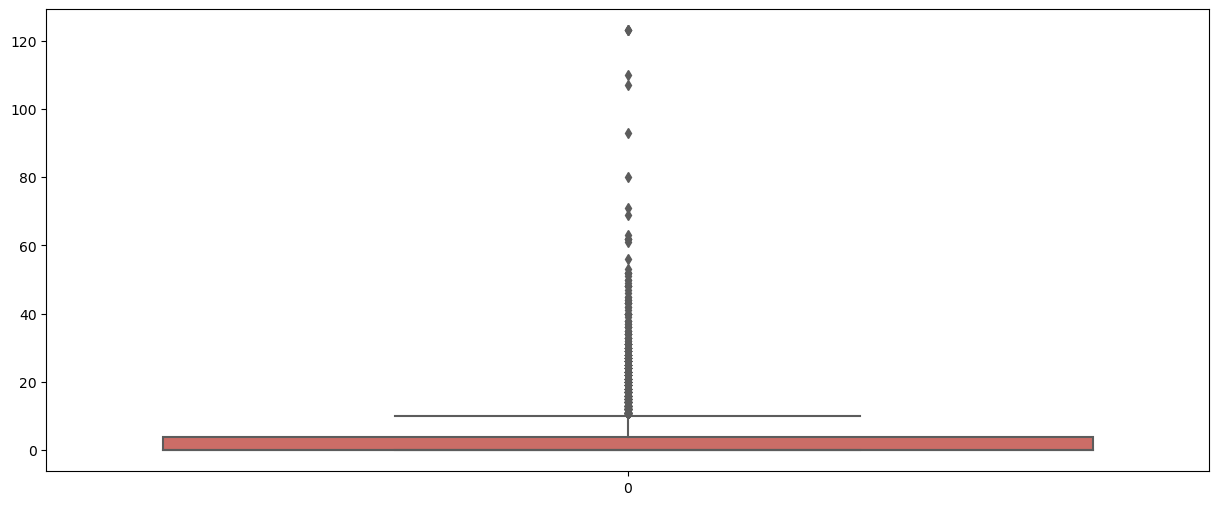

boxplot for : PURCHASES_TRX


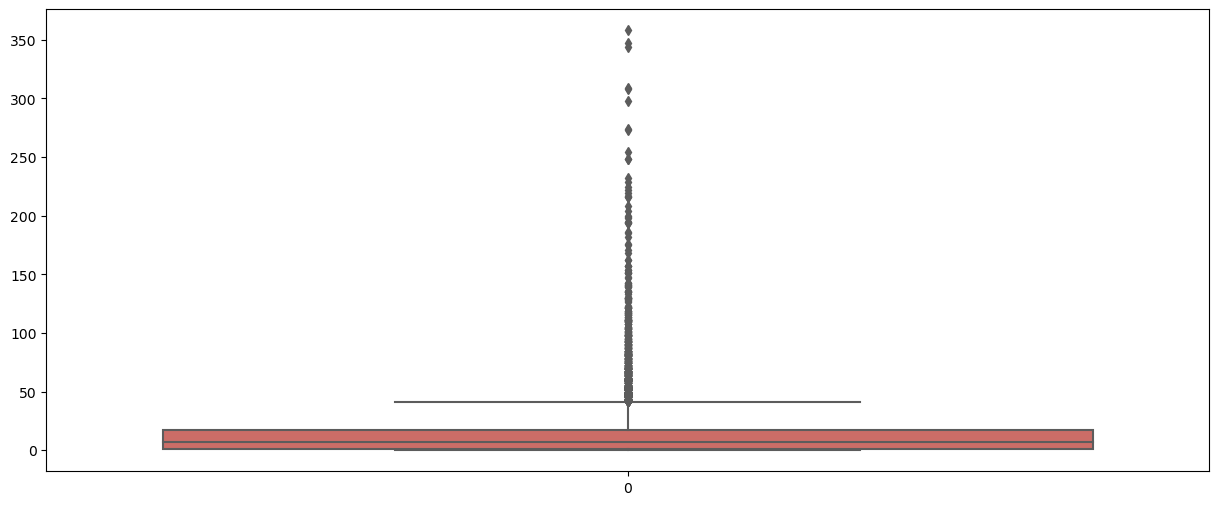

boxplot for : CREDIT_LIMIT


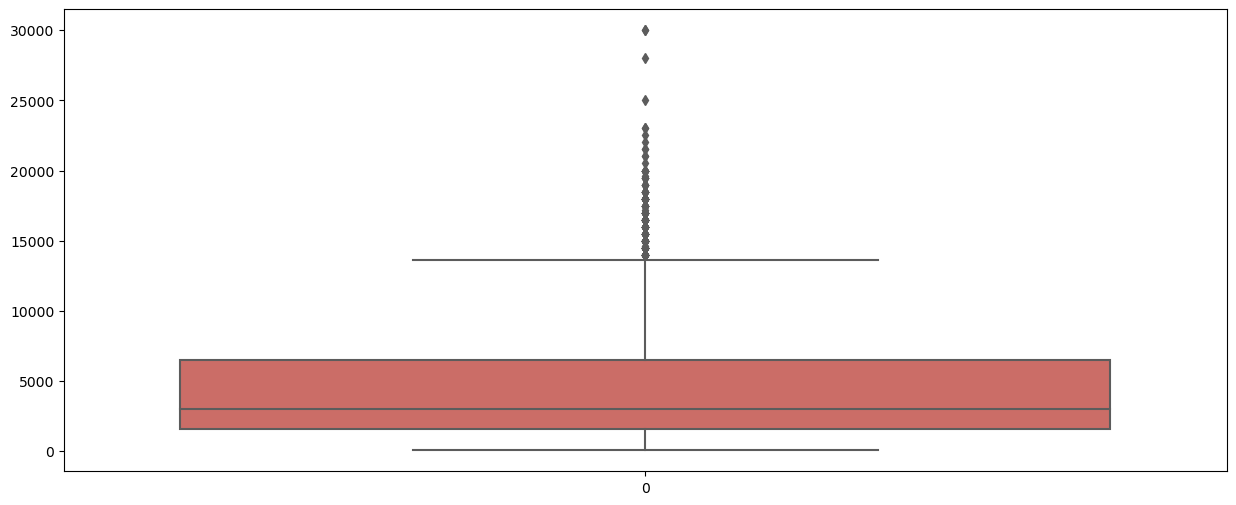

boxplot for : PAYMENTS


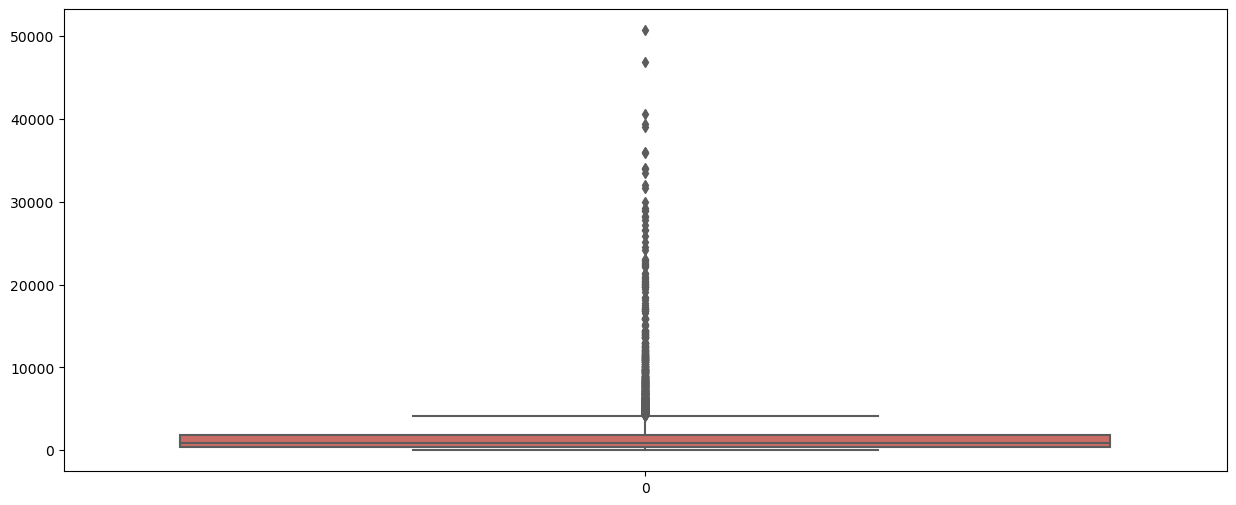

boxplot for : MINIMUM_PAYMENTS


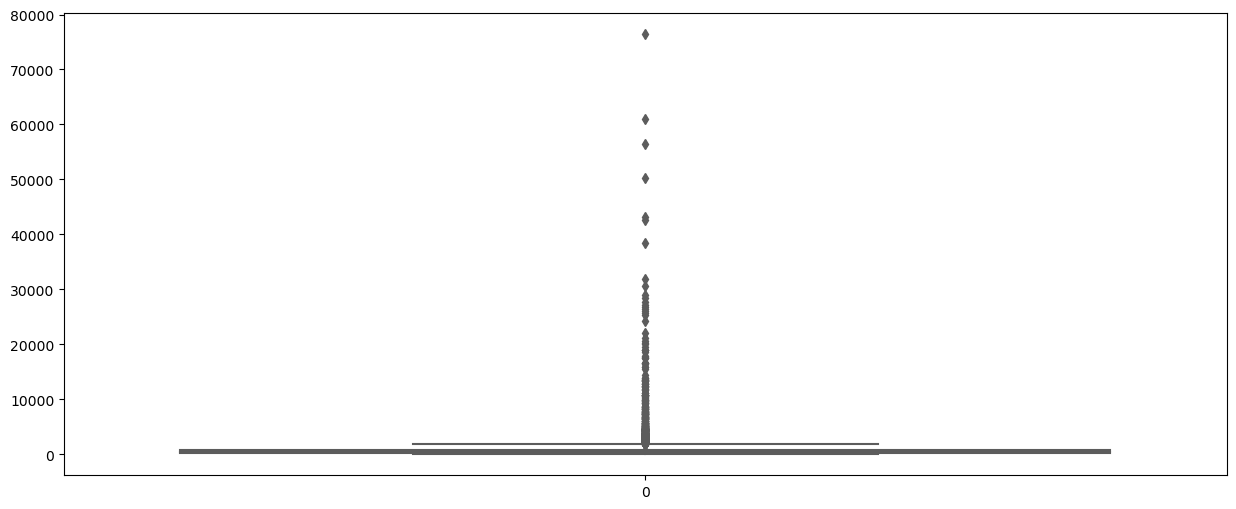

boxplot for : PRC_FULL_PAYMENT


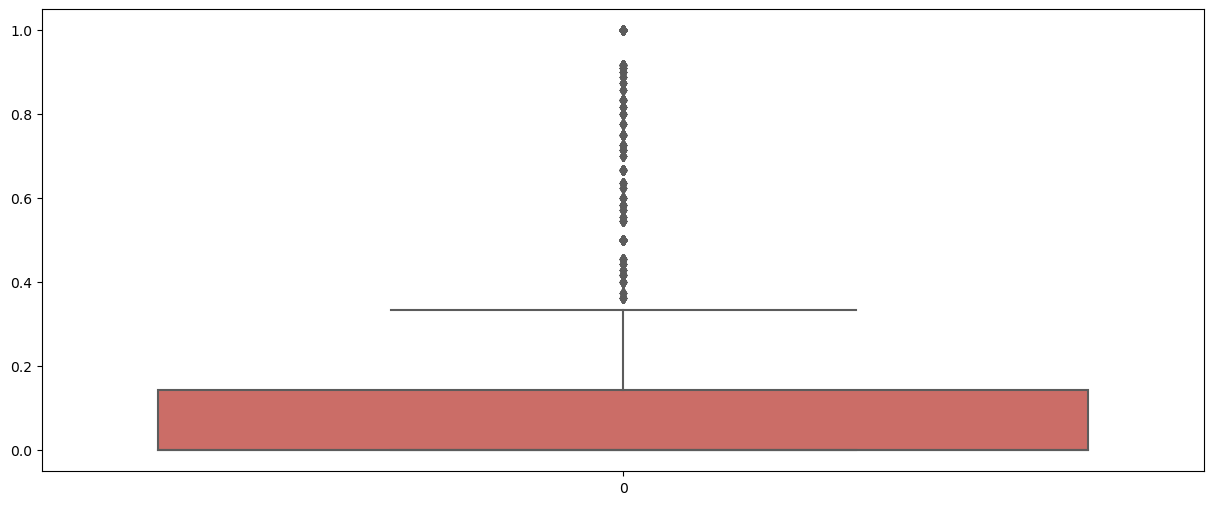

boxplot for : TENURE


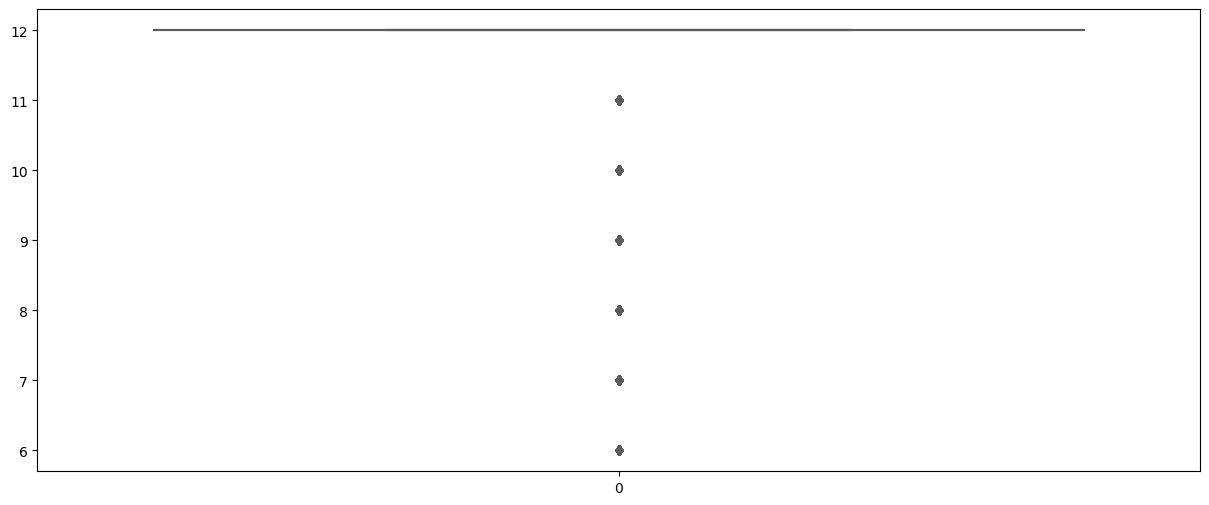

In [73]:
for i in data.columns:
    plt.figure(figsize=(15,6))
    print('boxplot for :',i)
    sns.boxplot(data[i],palette='hls')
    plt.show()

In [74]:
newone=data.copy()


In [75]:
Q1=newone.quantile(0.25)
Q3=newone.quantile(0.75)
IQR=Q3-Q1
print(IQR)

BALANCE                             1926.007066
BALANCE_FREQUENCY                      0.111111
PURCHASES                           1070.370000
ONEOFF_PURCHASES                     577.830000
INSTALLMENTS_PURCHASES               468.650000
CASH_ADVANCE                        1113.868654
PURCHASES_FREQUENCY                    0.833334
ONEOFF_PURCHASES_FREQUENCY             0.300000
PURCHASES_INSTALLMENTS_FREQUENCY       0.750000
CASH_ADVANCE_FREQUENCY                 0.222222
CASH_ADVANCE_TRX                       4.000000
PURCHASES_TRX                         16.000000
CREDIT_LIMIT                        4900.000000
PAYMENTS                            1517.996470
MINIMUM_PAYMENTS                     693.330929
PRC_FULL_PAYMENT                       0.142857
TENURE                                 0.000000
dtype: float64


In [76]:
newone=newone[~((newone<(Q1-1.5*IQR))|(newone>(Q3+1.5*IQR))).any(axis=1)]

In [77]:
newone.shape

(3008, 17)

There are more that 6000+records which are outliers. We can't remove all the records as more than 6000 values will be terminated.

FINDING THE CORRELATION BW FEATURES

In [78]:
import numpy as np

In [79]:
data_corr=data.corr()

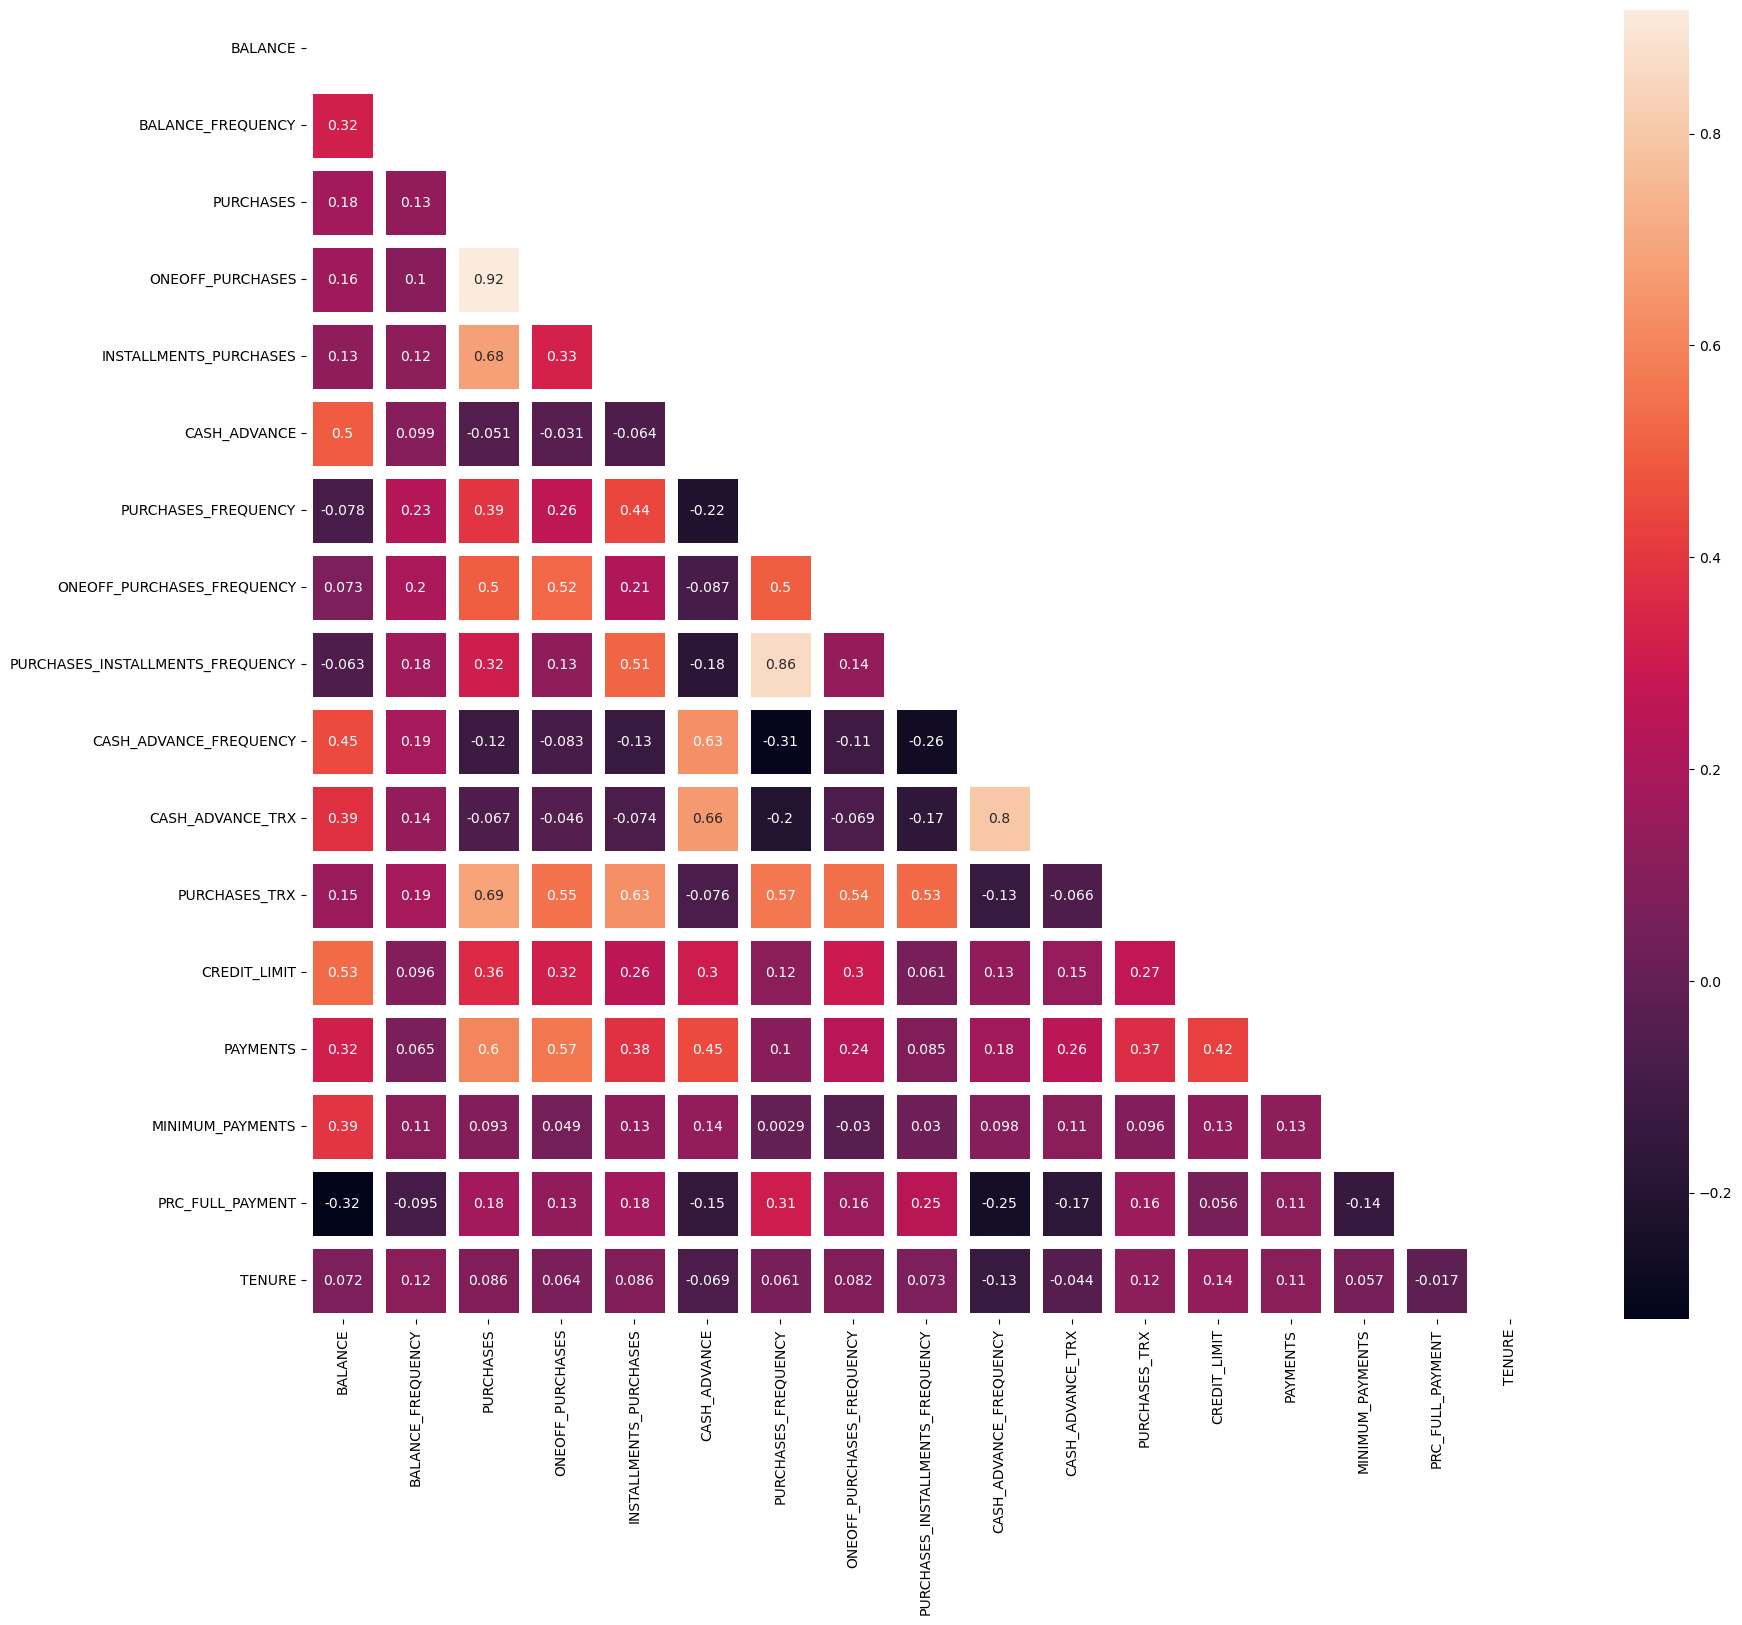

In [80]:
plt.figure(figsize=(20,17))
matrix=np.triu(data_corr)
sns.heatmap(data_corr,annot=True,linewidth=8,mask=matrix,cmap='rocket');
plt.show()

In [81]:
#WE cant use the features that has more correlation as it leads to overfitting

We are standardizing the values of the features to a common scale

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
x=pd.DataFrame(StandardScaler().fit_transform(data))

In [84]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.310993,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.089265,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.101699,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.000041,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.265819,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.349878,1.183844,-4.126919
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.000041,-0.525588,-4.126919
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.335490,0.329128,-4.126919
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.346930,0.329128,-4.126919


In [85]:
import yellowbrick#machine learning visualization library (selecting features,hyperparam tuning,increasing the model) 
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score,silhouette_score,calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from yellowbrick.style import set_palette

In [86]:
#transforming into array
X=np.asarray(x)
X

array([[-0.73205404, -0.24988139, -0.4249337 , ..., -0.31099323,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , ...,  0.08926514,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601, ..., -0.101699  ,
        -0.52558844,  0.36054128],
       ...,
       [-0.74046257, -0.18589504, -0.40200016, ..., -0.33548999,
         0.32912795, -4.12691899],
       [-0.74523857, -0.18589504, -0.4695839 , ..., -0.34693042,
         0.32912795, -4.12691899],
       [-0.57264377, -0.88976603,  0.0420915 , ..., -0.33297104,
        -0.52558844, -4.12691899]])

In [87]:
#Applying PCA(reduce the number of variables of a dataset while preserving as much as information as possible)
pca=PCA(n_components=2,random_state=24)
X=pca.fit_transform(X)

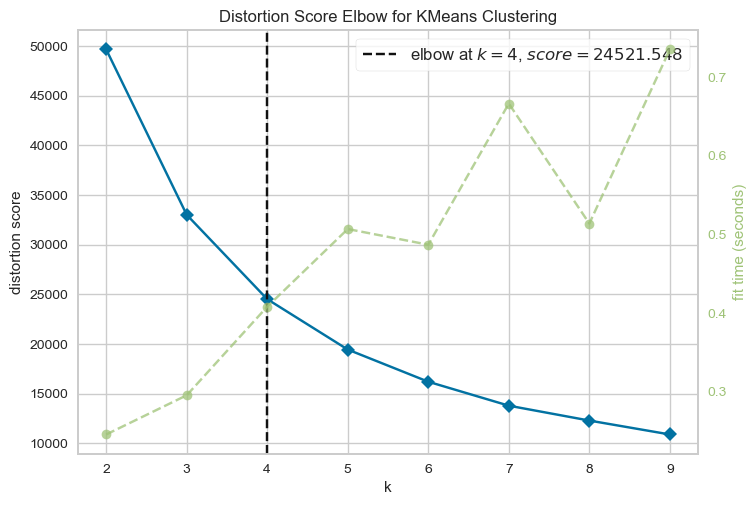

In [88]:
elbow_score=KElbowVisualizer(KMeans(random_state=32,max_iter=500),k=(2,10),timings=True)
elbow_score.fit(X)
elbow_score.finalize()
elbow_score.show()
plt.show()

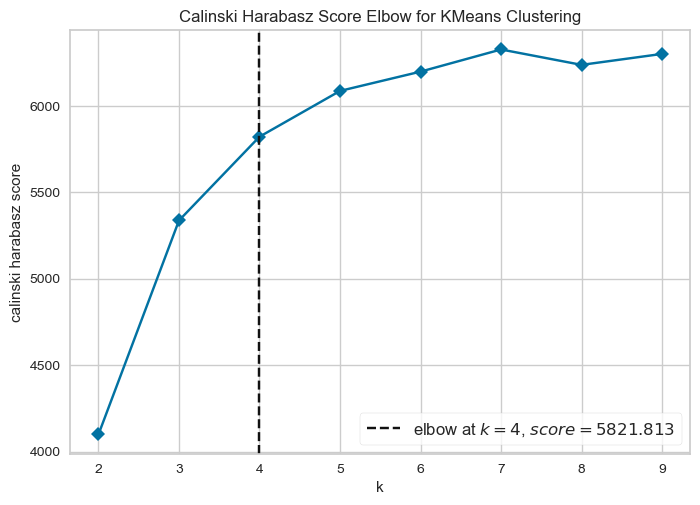

In [89]:
elbow_score_ch=KElbowVisualizer(KMeans(random_state=32,max_iter=500),k=(2,10),metric='calinski_harabasz',timings=False)
elbow_score_ch.fit(X)
elbow_score_ch.finalize()
elbow_score.show()
plt.show()

PERFORMING K MEANS CLUSTERING ALGORITHM

In [90]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=32,max_iter=500)
y_kmeans=kmeans.fit_predict(X)

In [91]:
y_kmeans

array([1, 2, 3, ..., 1, 1, 1])

In [92]:
centroids=kmeans.cluster_centers_
centroids

array([[ 6.00170951,  0.68849037],
       [-1.36240366, -0.19565823],
       [-0.53710067,  3.4212422 ],
       [ 0.9125548 , -1.16803753]])

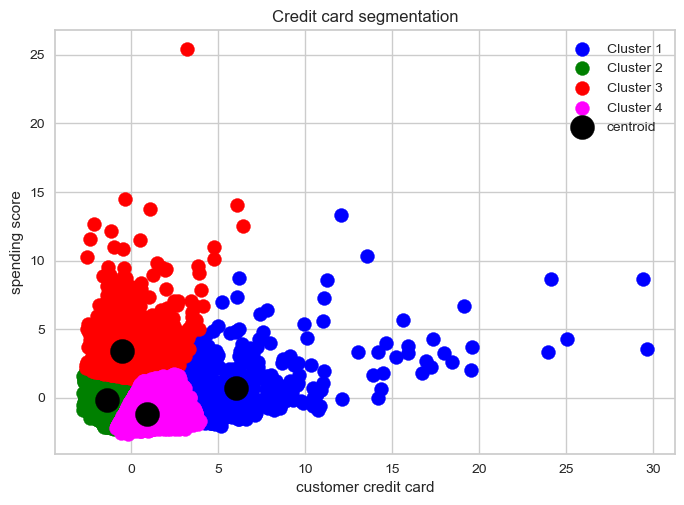

In [93]:
#visualizing the clusters
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='blue',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='green',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='red',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='magenta',label='Cluster 4')
plt.scatter(centroids[:,0],centroids[:,1],s=300,c='black',label='centroid')
plt.title('Credit card segmentation')
plt.xlabel('customer credit card')
plt.ylabel('spending score')
plt.legend()
plt.show()

In [94]:
label=kmeans.predict(X)

In [95]:
label

array([1, 2, 3, ..., 1, 1, 1])

In [96]:
centroids=kmeans.cluster_centers_

In [97]:
centroids

array([[ 6.00170951,  0.68849037],
       [-1.36240366, -0.19565823],
       [-0.53710067,  3.4212422 ],
       [ 0.9125548 , -1.16803753]])

In [98]:
labels=kmeans.labels_

In [99]:
#calculating the davies bouldin index
db=davies_bouldin_score(X,labels)

#calculating the silhoutte score
silhoutte=silhouette_score(X,labels)

#calculating the calinski-harabasz index
ch=calinski_harabasz_score(X,labels)

print('Davies-Bouldin Index',db)
print('Silhoutte Score',silhoutte)
print('Calinski-Harabasz index',ch)

Davies-Bouldin Index 0.8007247167410843
Silhoutte Score 0.40763351787748076
Calinski-Harabasz index 5821.813278383028


In [100]:
#silhouttevisualizer visualizes the silhoutte score of each cluster in a single model

In [101]:
cluster_colors=['#FFBB00','#3C096C','#9D4EDD','#FFE270']
labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Centroids']


In [102]:
#silhoutte visualizer is used to evaluate the density and seperation bw clusters
#silhoutte score is calculated using difference bw average intra cluster (-1,1).score is higher when clusters are dense and well seperated
#distance and mean nearest cluster distance
#while davies bouldin index refers the distance bw each cluster and every cluster
#lower the db index, higher the quality of cluster
#higher the silscore, higher the quality of clustering
#Ch index is the ratio of the sum of bw cluster dispersion and inter cluster dispersion

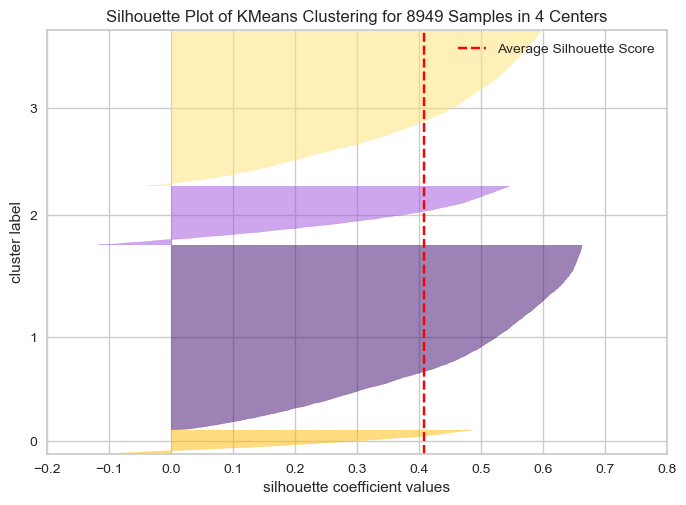

In [103]:
s_viz=SilhouetteVisualizer(kmeans,colors=cluster_colors)
s_viz.fit(X)
s_viz.finalize()

PERFORMING DB SCAN ALGORITHM

In [104]:
dbscan=DBSCAN(eps=0.5,min_samples=5)

#fit the data to model

dbscan.fit(X)

#predict the clusters for data points
labels=dbscan.labels_

#print the cluster labels
print(labels)

[0 0 0 ... 0 0 0]


In [105]:
labels=dbscan.labels_

#calculate the davies bouldin index
db=davies_bouldin_score(X,labels)

#calculating the silhouette score
silhouette=silhouette=silhouette_score(X,labels)

#calculating the calinski harasz index
ch=calinski_harabasz_score(X,labels)

#print the results
print('Davies-Bouldin Index:',db)
print('Silhouette Score',silhouette)
print('Calinski-Harabasz index',ch)

Davies-Bouldin Index: 1.1677578929986172
Silhouette Score 0.6267578450766262
Calinski-Harabasz index 519.537628854992


DBSCAN algorithm gives us lowest accuracy

PERFORMING HIERARCHIAL CLUSTERING

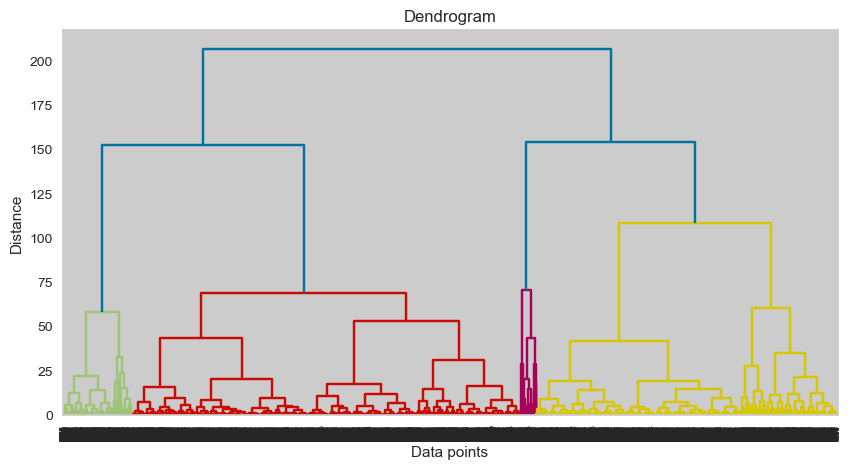

In [106]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z) 

plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

PERFORMING AGGLOMERATIVE CLUSTERING

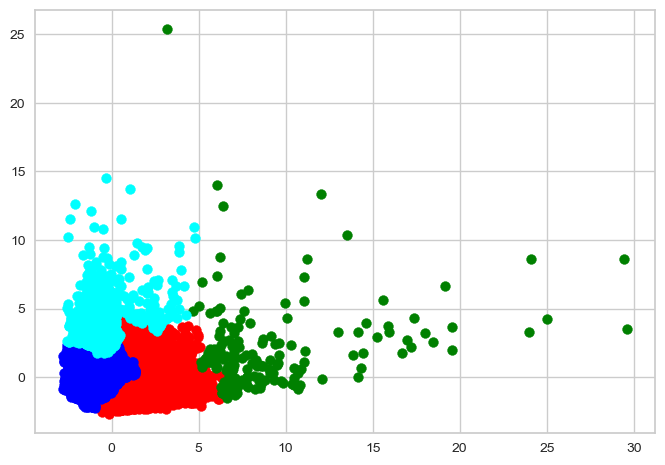

In [109]:
agg=AgglomerativeClustering(n_clusters=4)

#fit the agglomerative clustering to data
agg.fit(X)
#get the cluster labels
labels=agg.labels_

y_hc = agg.fit_predict(X)

#plot the clusters
# plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster4')
plt.show()

In [108]:
labels=agg.labels_

#calculate the Davies - Bouldin score
db=davies_bouldin_score(X,labels)

#calculate the silhouette score
silhouette=silhouette_score(X,labels)

#calculate the calinski-harabasz index
ch=calinski_harabasz_score(x,labels)

#print the results

print('Davies-Bouldin Index',db)
print('Silhouette score:',silhouette)
print('Calinski - Harabasz score',ch)

Davies-Bouldin Index 0.8355370417267904
Silhouette score: 0.3812997888267881
Calinski - Harabasz score 1440.1953903625772


Agglomerative clustering gives us the highest accuracy